# Installing Dependencies and Importing Libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 27.9 MB/s eta 0:00:00


In [4]:
!pip install interpret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 40.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 114.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 124.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 146.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 98.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.9/778.9 kB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 83.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.8/259.8 kB 23.7 MB/s eta 0:00:00
  Created wheel for dash-cytoscape: filename=dash_cytoscape-1.0.2-py3-none-any.whl size

In [5]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=6f3fce9c090d06881618d3cfc07a64a9c25a050e3f55d188f4b1c9e55d33e1fa
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [6]:
# Core scientific computing libraries
import numpy as np
import pandas as pd

# System and utility libraries
import os
import re
import time
import math
import tqdm
import itertools
import pickle
import warnings
warnings.filterwarnings("ignore")

# Plotting and visualization libraries
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import plotly.express as px
import plotly.offline as pyo
import seaborn as sns

# Imbalanced-learn (sampling techniques)
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Scikit-learn: Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Scikit-learn: Feature Selection
from sklearn.feature_selection import RFECV, SequentialFeatureSelector
from sklearn.model_selection import StratifiedKFold # Used often with feature selection

# Scikit-learn: Model Selection and Splitting
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict

# Scikit-learn: Metrics and Evaluation
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score
)

# Scikit-learn: Traditional Classifiers
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    AdaBoostClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Gradient Boosting Classifiers
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Load Dataset

In [7]:
folder_path = '/content/drive/MyDrive/CSE-CIC-IDS2018'

for filename in os.listdir(folder_path):
    print(os.path.join(folder_path, filename))

/content/drive/MyDrive/CSE-CIC-IDS2018/02-28-2018.csv
/content/drive/MyDrive/CSE-CIC-IDS2018/02-23-2018.csv
/content/drive/MyDrive/CSE-CIC-IDS2018/02-21-2018.csv
/content/drive/MyDrive/CSE-CIC-IDS2018/02-22-2018.csv
/content/drive/MyDrive/CSE-CIC-IDS2018/03-01-2018.csv
/content/drive/MyDrive/CSE-CIC-IDS2018/02-20-2018.csv
/content/drive/MyDrive/CSE-CIC-IDS2018/02-15-2018.csv
/content/drive/MyDrive/CSE-CIC-IDS2018/02-14-2018.csv
/content/drive/MyDrive/CSE-CIC-IDS2018/03-02-2018.csv
/content/drive/MyDrive/CSE-CIC-IDS2018/02-16-2018.csv
/content/drive/MyDrive/CSE-CIC-IDS2018/cic_ids_2018_cleaned_features.csv
/content/drive/MyDrive/CSE-CIC-IDS2018/cleaned_features.csv


# Read Dataset

In [8]:
# Use %%time to measure the execution time of the loop
%%time

# List of file paths for the network data
file_paths = [
    "/content/drive/MyDrive/CSE-CIC-IDS2018/02-14-2018.csv",
    "/content/drive/MyDrive/CSE-CIC-IDS2018/02-15-2018.csv",
    "/content/drive/MyDrive/CSE-CIC-IDS2018/02-16-2018.csv",
    "/content/drive/MyDrive/CSE-CIC-IDS2018/02-20-2018.csv",
    "/content/drive/MyDrive/CSE-CIC-IDS2018/02-28-2018.csv",
    "/content/drive/MyDrive/CSE-CIC-IDS2018/02-23-2018.csv",
    "/content/drive/MyDrive/CSE-CIC-IDS2018/02-21-2018.csv",
    "/content/drive/MyDrive/CSE-CIC-IDS2018/02-22-2018.csv",
    "/content/drive/MyDrive/CSE-CIC-IDS2018/03-01-2018.csv",
    "/content/drive/MyDrive/CSE-CIC-IDS2018/03-02-2018.csv",
]

# Create a dictionary to store the dataframes, with more descriptive names
network_datasets = {}


for i, file_path in enumerate(file_paths):
    # Extract the filename (e.g., "02-14-2018") to use in the variable name
    file_name = os.path.basename(file_path).split('.')[0]
    # Create a descriptive variable name, e.g., 'ids_data_20180214'
    df_name = f"ids_data_{file_name.replace('-', '')}"
    network_datasets[df_name] = pd.read_csv(file_path, low_memory=True)
    print(f"Loaded {file_name}.csv as '{df_name}'")

Loaded 02-14-2018.csv as 'ids_data_02142018'
Loaded 02-15-2018.csv as 'ids_data_02152018'
Loaded 02-16-2018.csv as 'ids_data_02162018'
Loaded 02-20-2018.csv as 'ids_data_02202018'
Loaded 02-28-2018.csv as 'ids_data_02282018'
Loaded 02-23-2018.csv as 'ids_data_02232018'
Loaded 02-21-2018.csv as 'ids_data_02212018'
Loaded 02-22-2018.csv as 'ids_data_02222018'
Loaded 03-01-2018.csv as 'ids_data_03012018'
Loaded 03-02-2018.csv as 'ids_data_03022018'
CPU times: user 1min 30s, sys: 10.8 s, total: 1min 41s
Wall time: 1min 59s


In [9]:
network_datasets['ids_data_02202018'].drop(columns=['Flow ID', 'Src IP', 'Src Port', 'Dst IP'], axis=1, inplace=True)

In [10]:
def fixDataType(df_dataset):
    """
    Cleans and converts the data types of specified columns in a network traffic DataFrame.

    This function first removes any rows that are likely header duplicates mistakenly
    read as data. Then, it iterates through a predefined list of columns and
    converts them to their appropriate integer or float data types.

    Args:
        df_dataset (pd.DataFrame): The input DataFrame containing network traffic data.

    Returns:
        pd.DataFrame: The DataFrame with cleaned data and corrected data types.
    """

    # --- Step 1: Handle potential duplicate header rows ---
    # In some concatenated CSVs, header rows might appear as data entries.
    # This line filters out such rows where 'Dst Port' column value is literally 'Dst Port'.
    df_dataset = df_dataset[df_dataset['Dst Port'] != 'Dst Port'].copy()
    # Using .copy() to avoid SettingWithCopyWarning, ensuring operations
    # are on a new DataFrame after filtering.

    # --- Step 2: Define column groups for type conversion ---
    # This makes the code cleaner and easier to manage, especially if you have many columns
    # or want to adjust types for multiple columns at once.

    # Columns to be converted to integer type
    int_columns = [
        'Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
        'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
        'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Flow IAT Max', 'Flow IAT Min',
        'Fwd IAT Tot', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot',
        'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
        'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len',
        'Pkt Len Min', 'Pkt Len Max', 'FIN Flag Cnt', 'SYN Flag Cnt',
        'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
        'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Fwd Byts/b Avg',
        'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg',
        'Bwd Blk Rate Avg', 'Subflow Fwd Pkts', 'Subflow Fwd Byts',
        'Subflow Bwd Pkts', 'Subflow Bwd Byts', 'Init Fwd Win Byts',
        'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min',
        'Active Max', 'Active Min', 'Idle Max', 'Idle Min'
    ]

    # Columns to be converted to float type
    float_columns = [
        'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std',
        'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std',
        'Fwd IAT Mean', 'Fwd IAT Std', 'Bwd IAT Mean', 'Bwd IAT Std',
        'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var',
        'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg',
        'Active Mean', 'Active Std', 'Idle Mean', 'Idle Std'
    ]

    # --- Step 3: Perform type conversions ---
    # Apply type conversion to integer columns
    for col in int_columns:
        if col in df_dataset.columns: # Check if column exists to prevent KeyError
            # Handle potential non-numeric values (e.g., NaN, 'Infinity') before conversion
            # replace non-numeric with NaN, then fill NaN with 0 or a suitable default
            # and finally convert to int.
            df_dataset[col] = pd.to_numeric(df_dataset[col], errors='coerce').fillna(0).astype(int)
            # errors='coerce' will turn non-convertible values into NaN.
            # .fillna(0) then replaces those NaNs with 0 before int conversion.
            # You might choose a different fill value (e.g., -1) based on context.
        else:
            print(f"Warning: Integer column '{col}' not found in the dataset.")


    # Apply type conversion to float columns
    for col in float_columns:
        if col in df_dataset.columns: # Check if column exists
            # Handle potential non-numeric values (e.g., NaN, 'Infinity', empty strings)
            # pd.to_numeric is robust for handling these.
            df_dataset[col] = pd.to_numeric(df_dataset[col], errors='coerce').astype(float)
            # For float columns, NaNs are often acceptable and handled by models.
            # If you need to fill NaNs, consider df_dataset[col].fillna(0.0) or mean/median.
        else:
            print(f"Warning: Float column '{col}' not found in the dataset.")

    return df_dataset

In [11]:
%%time
# Iterate over each item (key-value pair) in the 'network_datasets' dictionary.
# 'df_name' will be the string key (e.g., 'ids_data_02142018'),
# and 'df' will be the actual pandas DataFrame object.
for df_name, df in network_datasets.items():
    # Apply the 'fixDataType' function to the current DataFrame ('df').
    # The 'fixDataType' function is assumed to process the DataFrame (e.g.,
    # convert columns to appropriate data types) and return the modified DataFrame.
    # The result is then assigned back to the same key in the 'network_datasets'
    # dictionary, effectively updating the DataFrame in place.
    network_datasets[df_name] = fixDataType(df)

    # Optional: Print a message to track the progress and confirm which DataFrame
    # has been processed. This line can be commented out or removed in production
    # code if you don't need real-time feedback during execution.
    print(f"Applied fixDataType to '{df_name}'")

Applied fixDataType to 'ids_data_02142018'
Applied fixDataType to 'ids_data_02152018'
Applied fixDataType to 'ids_data_02162018'
Applied fixDataType to 'ids_data_02202018'
Applied fixDataType to 'ids_data_02282018'
Applied fixDataType to 'ids_data_02232018'
Applied fixDataType to 'ids_data_02212018'
Applied fixDataType to 'ids_data_02222018'
Applied fixDataType to 'ids_data_03012018'
Applied fixDataType to 'ids_data_03022018'
CPU times: user 33.1 s, sys: 7.53 s, total: 40.6 s
Wall time: 40.1 s


#Exploratory Data Analysis

## **Data Properties**

In [12]:
def dataProperties(df, day):
    """
    Prints various properties and statistics of a given Pandas DataFrame.
    """
    # Indicate which day's data is being processed
    print(day)

    # df.shape returns (rows, columns); not printed directly here
    df.shape

    # Print the number of rows (samples) in the DataFrame
    print('Number of rows (Samples): ', df.shape[0])

    # Print the number of columns (features) in the DataFrame
    print('Number of columns (Features): ', df.shape[1])

    # Print the entire DataFrame. Use df.head() for large datasets to avoid excessive output.
    print(df)

    # Print a concise summary of the DataFrame including data types and non-null counts.
    # df.info() itself prints to console and returns None.
    print(df.info())

    # Print the count of unique values in the 'Label' column, useful for class distribution.
    print(df['Label'].value_counts())

    # Add vertical spacing for readability between outputs
    print("\n\n\n")

In [13]:
%%time
# Get the DataFrame names (keys) and sort them chronologically.
# This assumes the date is always the last part of the key in 'MMDDYYYY' format.
sorted_df_names = sorted(network_datasets.keys(), key=lambda x: pd.to_datetime(x.split('_')[-1], format='%m%d%Y'))

# Loop through the sorted DataFrame names, using enumerate to get a numerical day counter.
for i, df_name in enumerate(sorted_df_names):
    # Construct the "Day X" label (e.g., "Day 1", "Day 2", etc.)
    day_label = f"Day {i + 1}"

    # Call the dataProperties function with the current DataFrame and its day label.
    dataProperties(network_datasets[df_name], day_label)

Day 1
Number of rows (Samples):  1048575
Number of columns (Features):  80
         Dst Port  Protocol            Timestamp  Flow Duration  Tot Fwd Pkts  \
0               0         0  14/02/2018 08:31:01      112641719             3   
1               0         0  14/02/2018 08:33:50      112641466             3   
2               0         0  14/02/2018 08:36:39      112638623             3   
3              22         6  14/02/2018 08:40:13        6453966            15   
4              22         6  14/02/2018 08:40:23        8804066            14   
...           ...       ...                  ...            ...           ...   
1048570        80         6  14/02/2018 10:53:23       10156986             5   
1048571        80         6  14/02/2018 10:53:33            117             2   
1048572        80         6  14/02/2018 10:53:28        5095331             3   
1048573        80         6  14/02/2018 10:53:28        5235511             3   
1048574       443         6  14/02

## **Data Visualizations**

In [14]:
def get_day_suffix(day):
    """Returns the day number with its appropriate suffix (e.g., '1st', '2nd', '12th')."""
    if 10 <= day % 100 <= 20:
        suffix = 'th'
    else:
        suffix = {1: 'st', 2: 'nd', 3: 'rd'}.get(day % 10, 'th')
    return f"{day}{suffix}"

### **Bar Chart**

In [15]:
def visualizeBar(df, title_suffix=""):
    """
    Generates a bar chart for 'Label' distribution with a dynamic title and colored bars.
    """
    # Check if 'Label' column exists to prevent errors.
    if 'Label' not in df.columns:
        print(f"Warning: 'Label' column not found. Skipping bar chart.")
        return

    # Get unique labels and their counts for plotting.
    label_counts = df['Label'].value_counts()
    unique_labels = label_counts.index

    # Create a new plot figure.
    plt.figure(figsize=(12, 6))

    # Set the dynamic title for the bar chart.
    plt.title(f'Packet Distribution for {title_suffix}')

    # Generate a distinct color for each bar using a colormap.
    colors = plt.cm.tab10(range(len(unique_labels)))

    # Create the bar chart with dynamic colors.
    plt.bar(x=unique_labels, height=label_counts, color=colors)

    # Add labels and rotate x-axis ticks for readability.
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout() # Adjust layout.

    # Get the current figure object.
    p = plt.gcf()
    plt.show() # Display the plot.


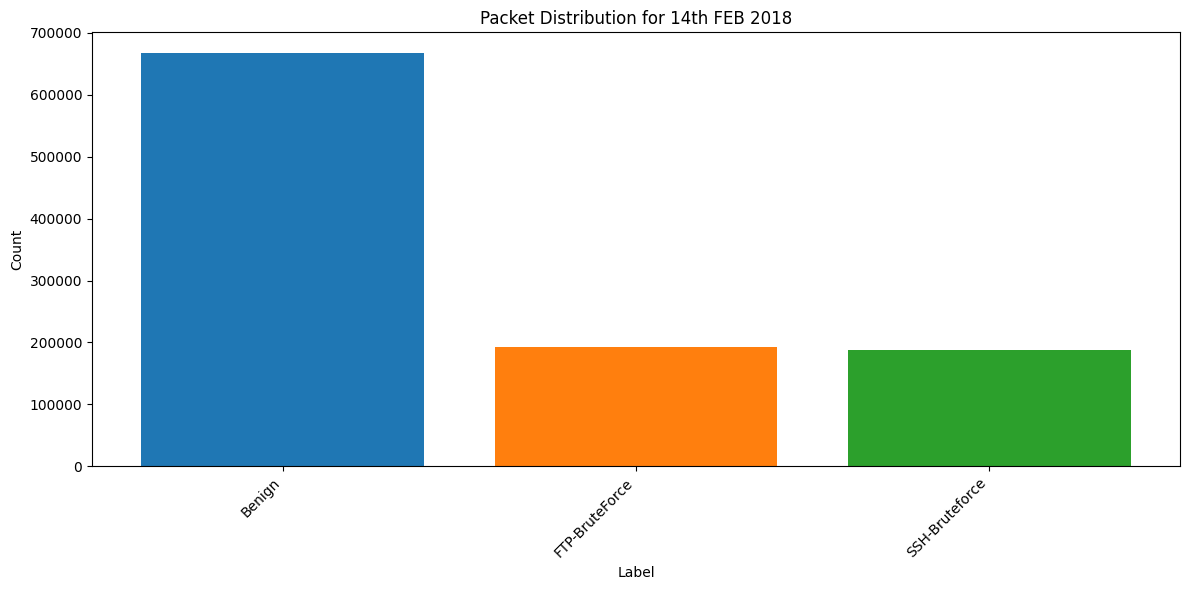

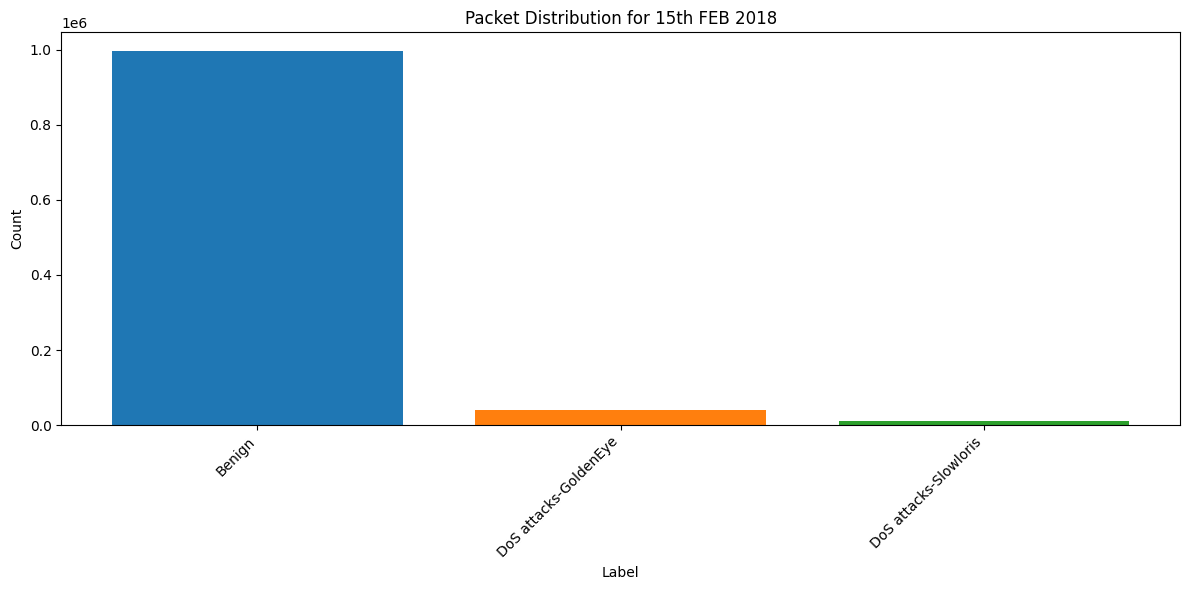

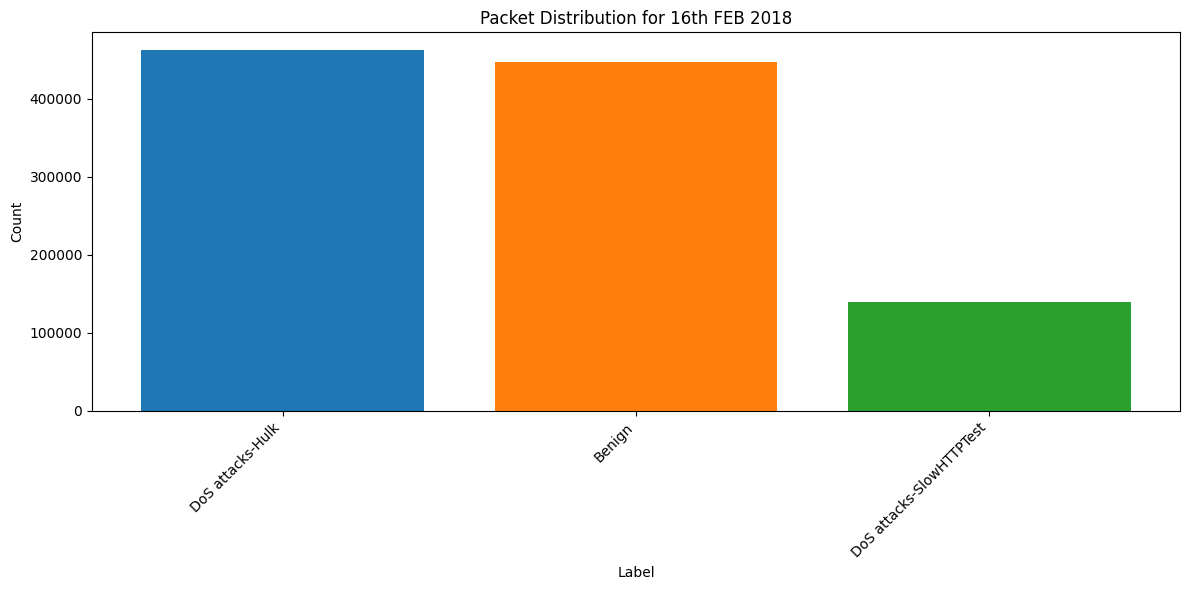

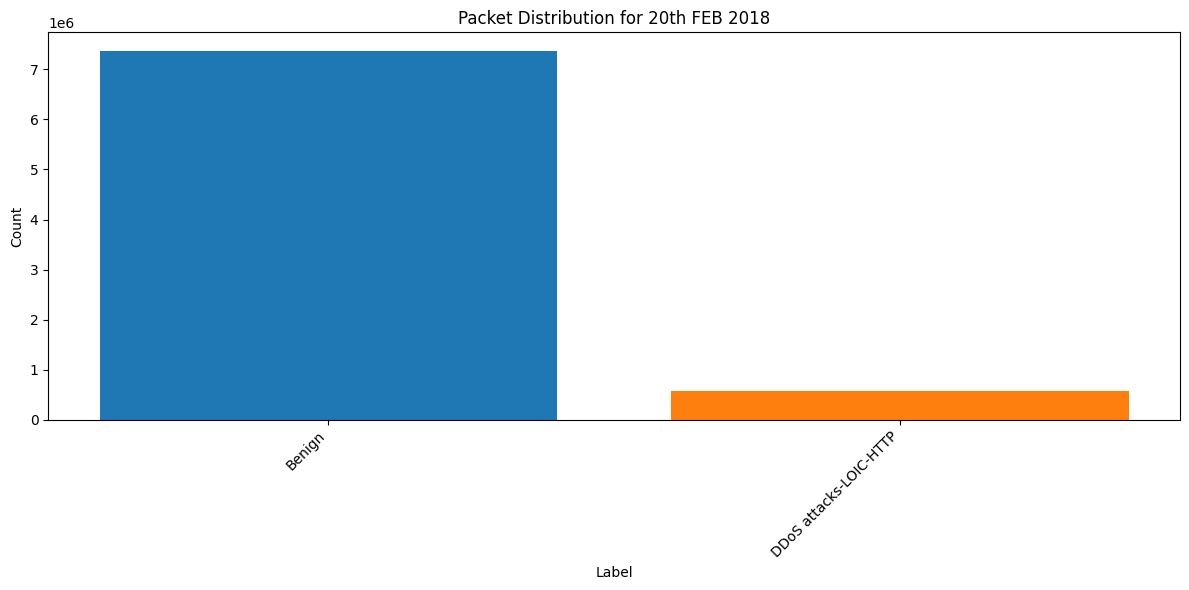

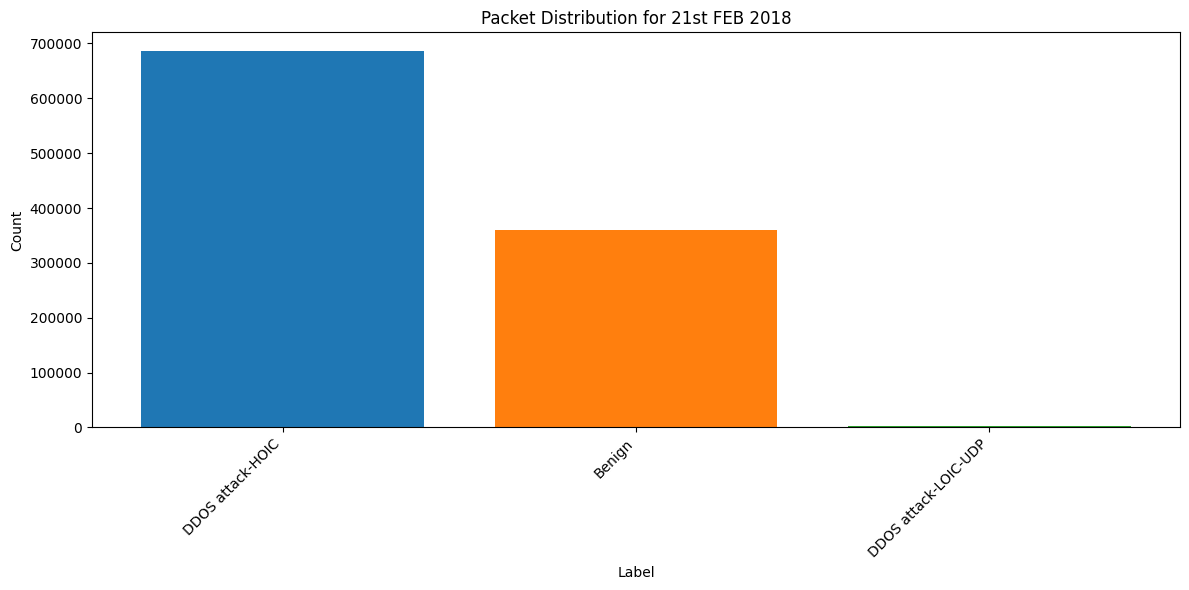

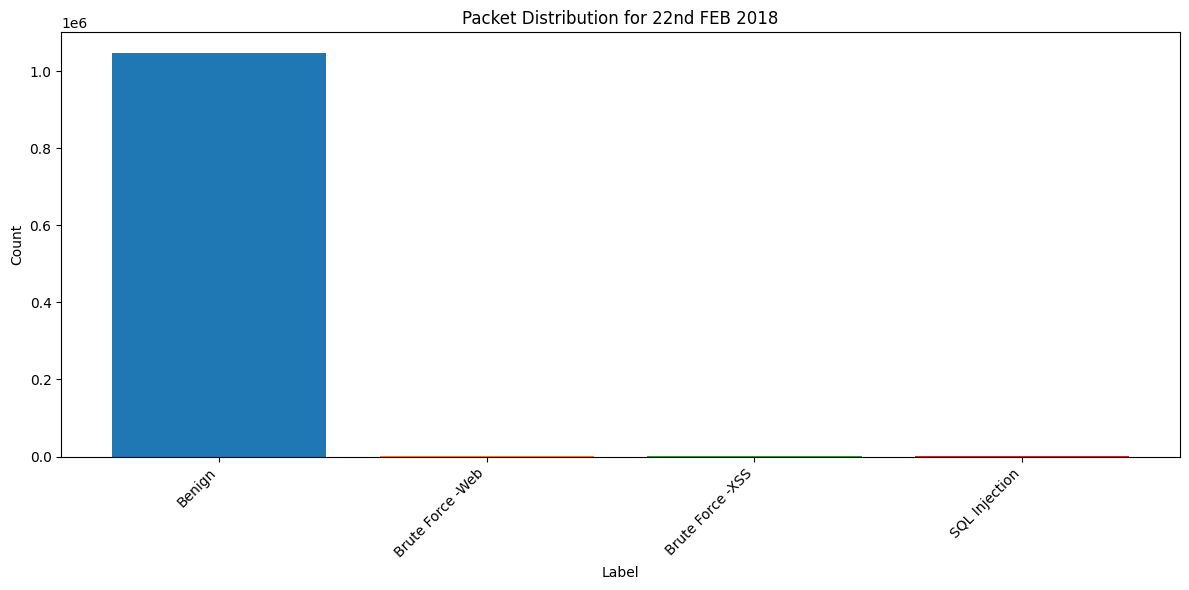

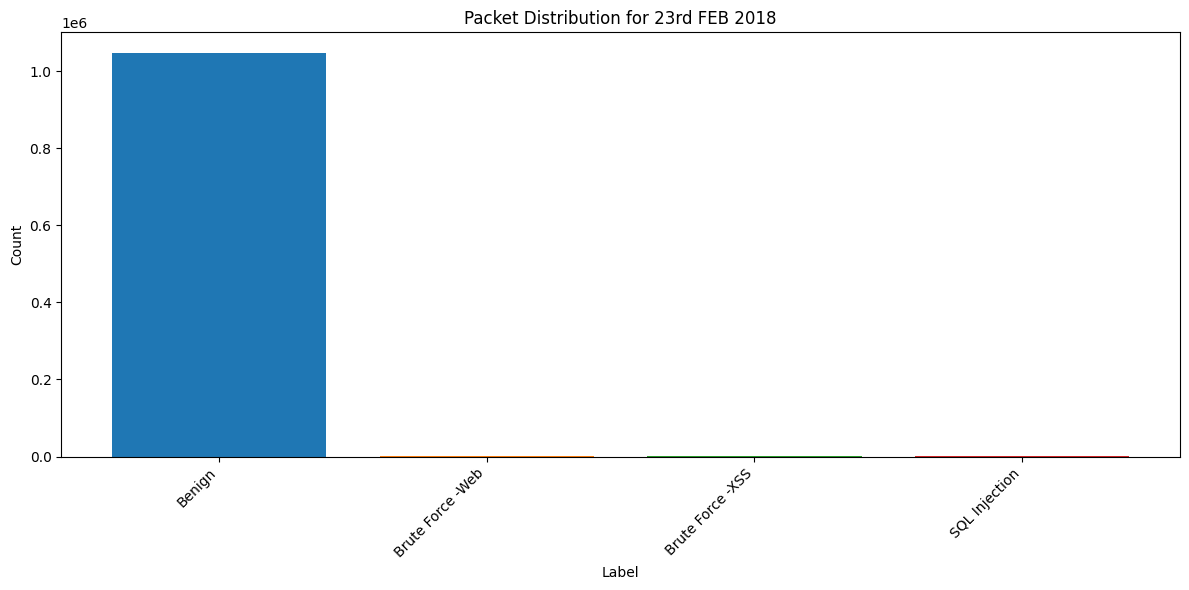

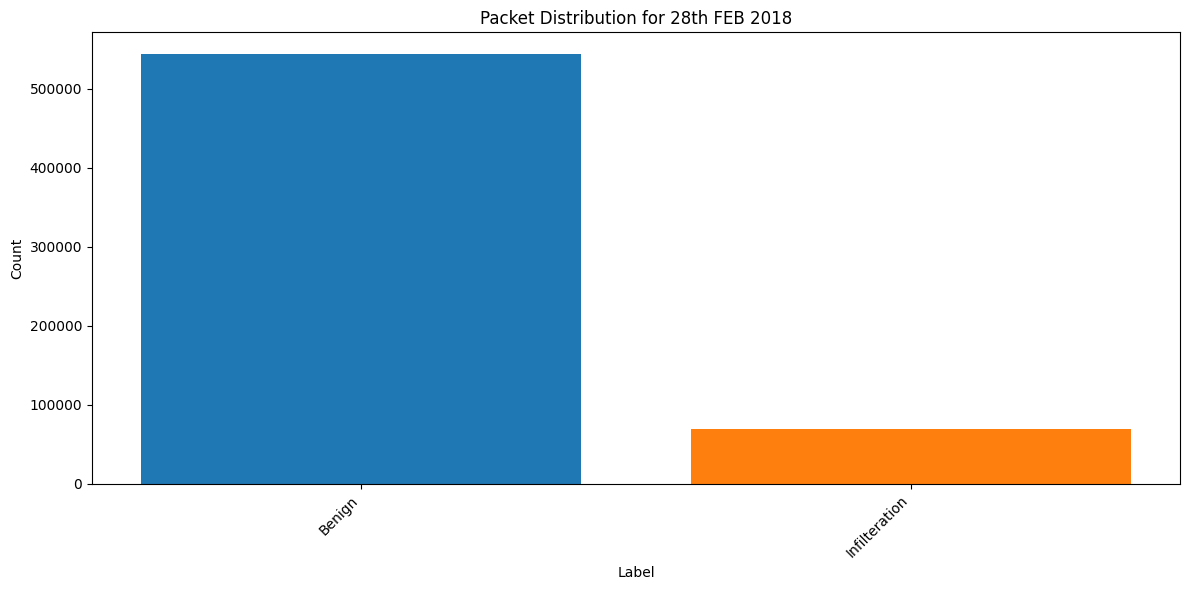

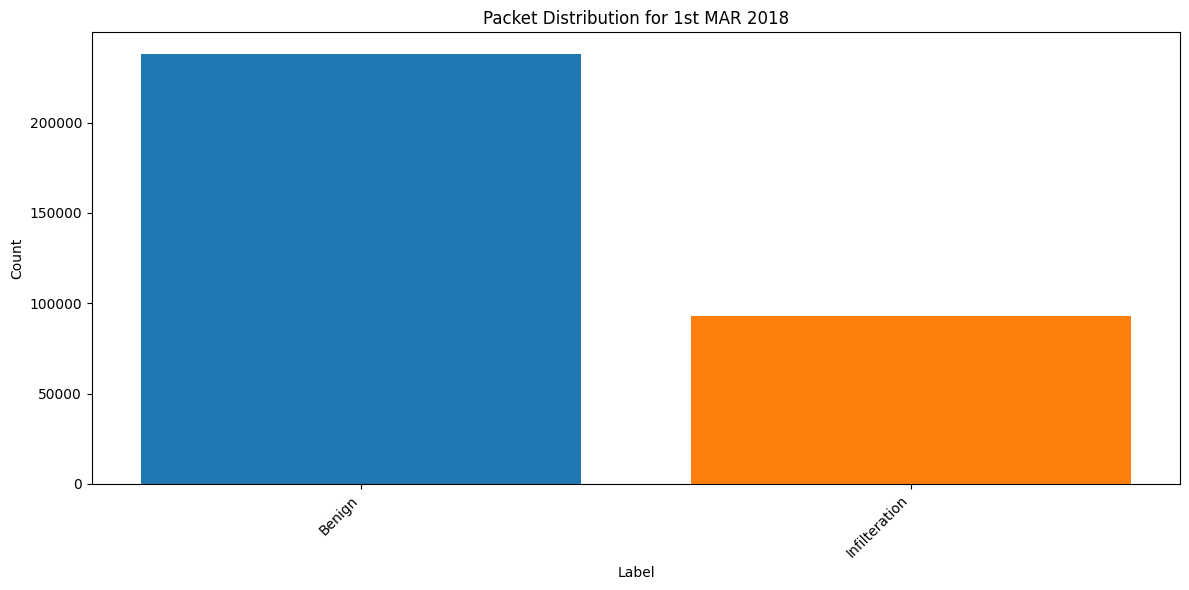

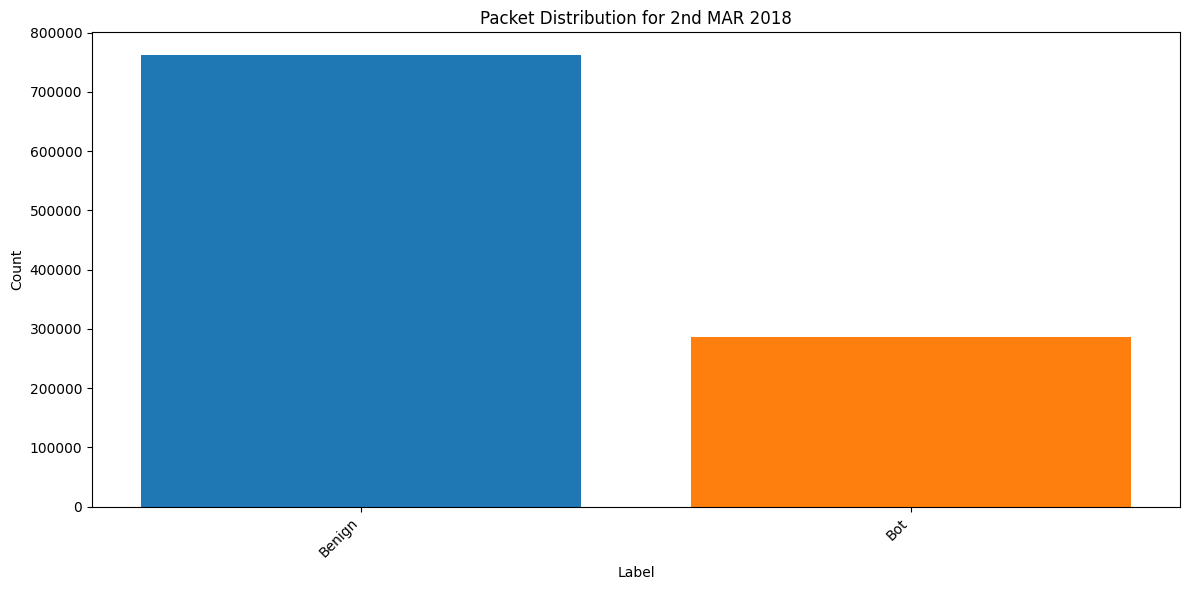



CPU times: user 1.98 s, sys: 46.1 ms, total: 2.03 s
Wall time: 2.05 s


In [16]:
%%time
# Loop through the sorted DataFrame names.
for df_name in sorted_df_names:
    # 1. Extract the raw date string (e.g., '02142018').
    raw_date_str = df_name.replace('ids_data_', '')

    # 2. Convert it to a datetime object.
    date_obj = pd.to_datetime(raw_date_str, format='%m%d%Y')

    # 3. Format the datetime object to "Dayth MON YYYY".
    day_with_suffix = get_day_suffix(date_obj.day)
    formatted_date_str = f"{day_with_suffix} {date_obj.strftime('%b').upper()} {date_obj.year}"

    # Call visualizeBar, passing the DataFrame and the newly formatted date string.
    visualizeBar(network_datasets[df_name], formatted_date_str)

    # Add spacing between plots.
    print("\n")

### **Pie Chart**

In [17]:
def visualizePie(df, title_suffix=""):
    """
    Generates a donut (pie with a hole) chart for 'Label' distribution with a dynamic title.

    Args:
        df (pd.DataFrame): The DataFrame containing the 'Label' column.
        title_suffix (str): A string to append to the chart title (e.g., a date).
    """
    # Check if 'Label' column exists.
    if 'Label' not in df.columns:
        print(f"Warning: 'Label' column not found. Skipping pie chart.")
        return

    # Create a new plot figure with equal width and height.
    plt.figure(figsize=(8, 8)) # Increased size for better readability

    # Create a white circle to place in the center, forming a donut chart.
    # (0,0) is the center, 0.7 is the radius.
    circle = plt.Circle((0, 0), 0.7, color='white')

    # Set the dynamic title for the pie chart.
    plt.title(f'Packet Distribution for {title_suffix}')

    # Create the pie chart:
    # values from df['Label'].value_counts()
    # labels from df['Label'].unique()
    # autopct='%1.1f%%' displays percentages on slices.
    # startangle=90 starts the first slice from the top.
    plt.pie(df['Label'].value_counts(), labels=df['Label'].unique(), autopct='%1.1f%%', startangle=90)

    # Get the current figure and axes, then add the white circle to create the hole.
    p = plt.gcf()
    p.gca().add_artist(circle)

    # Ensure the pie chart is circular.
    plt.axis('equal')

    plt.show() # Display the plot.

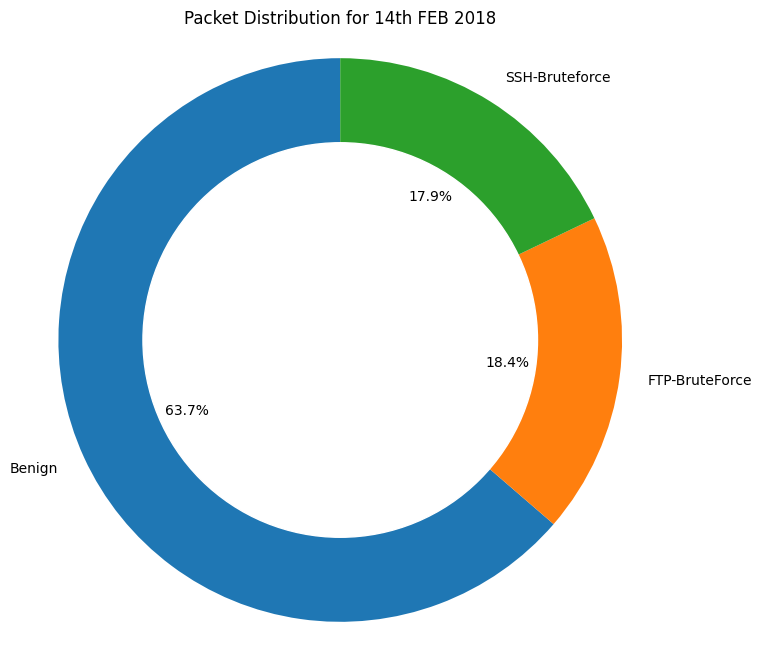

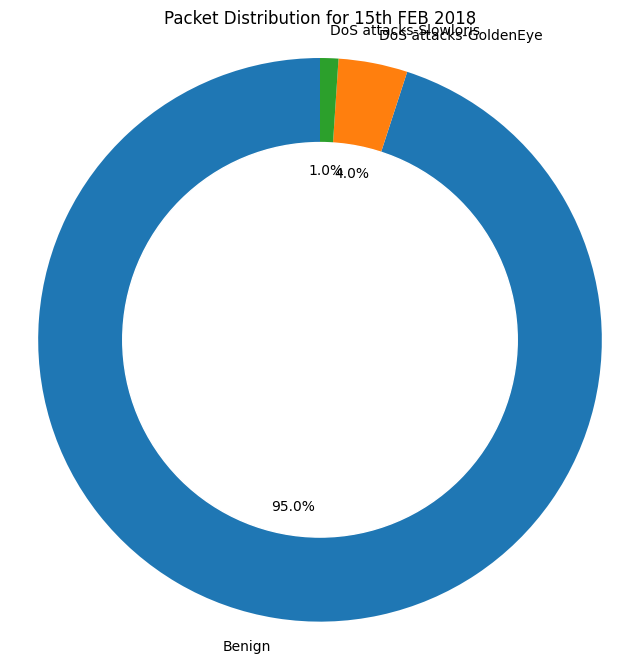

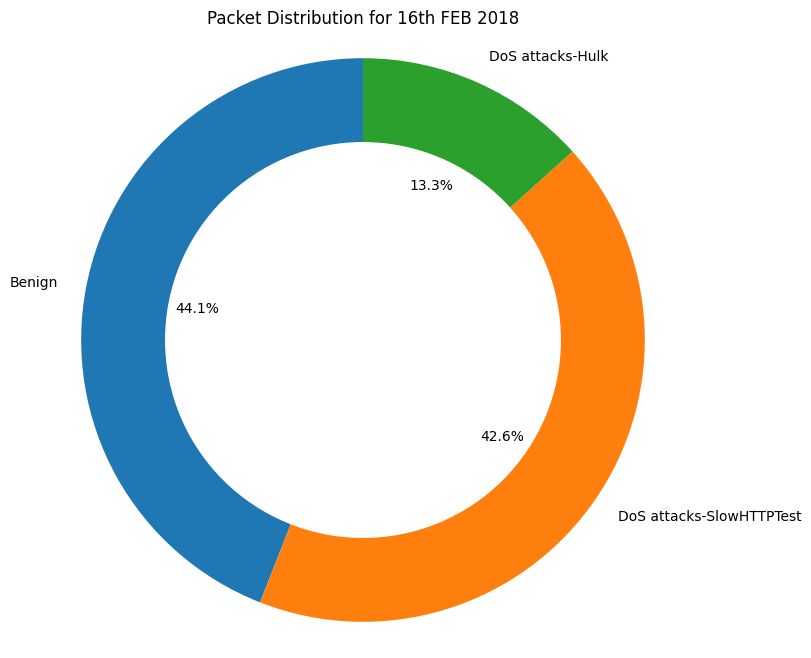

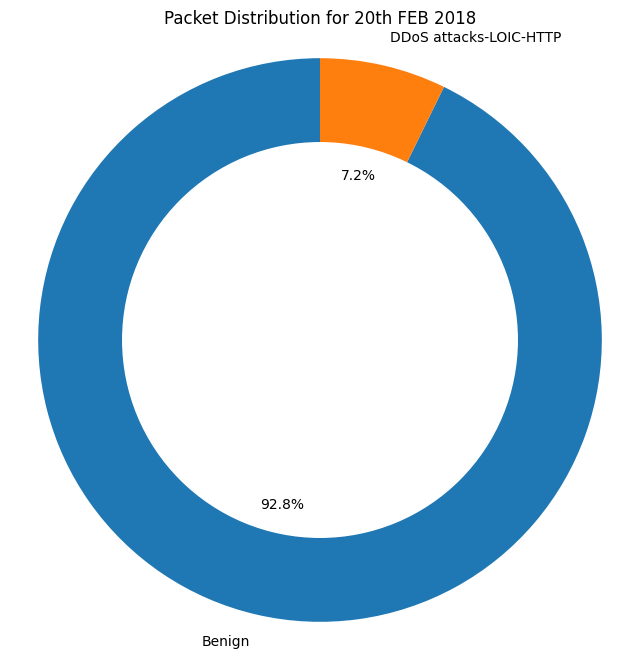

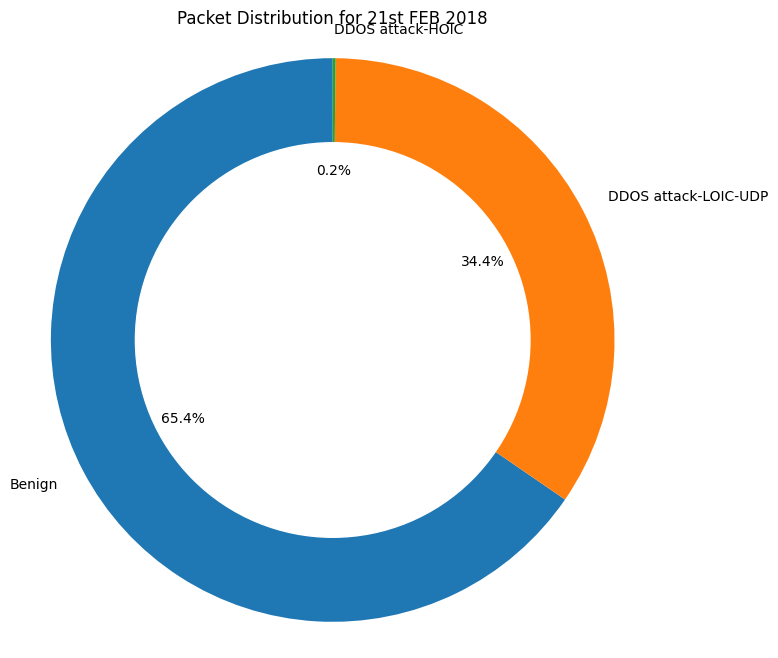

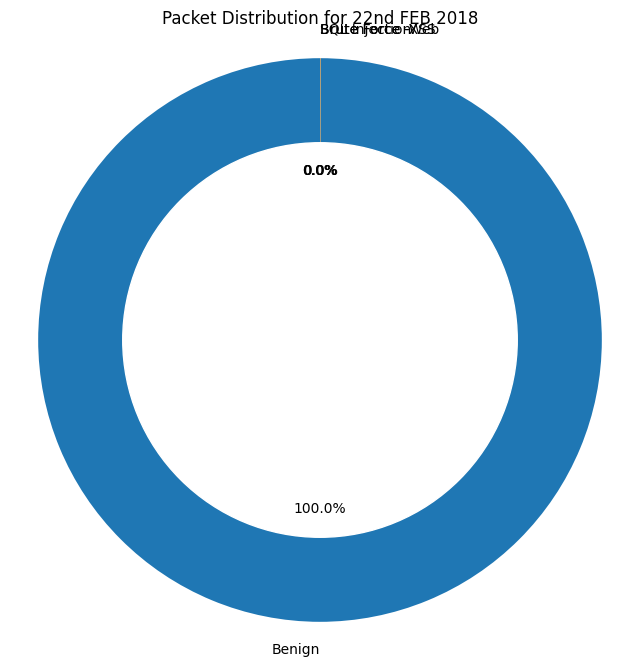

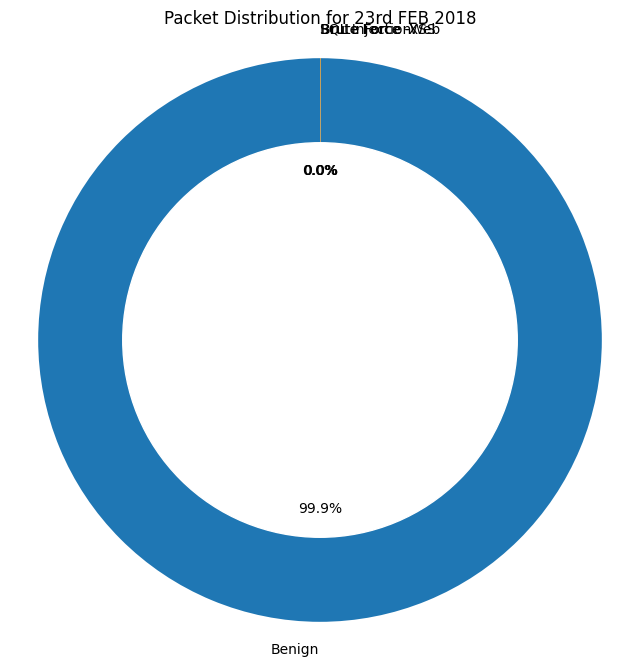

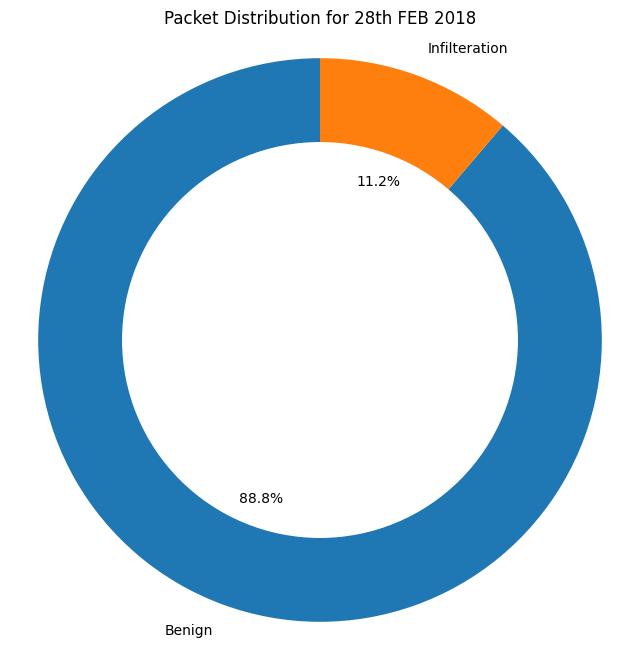

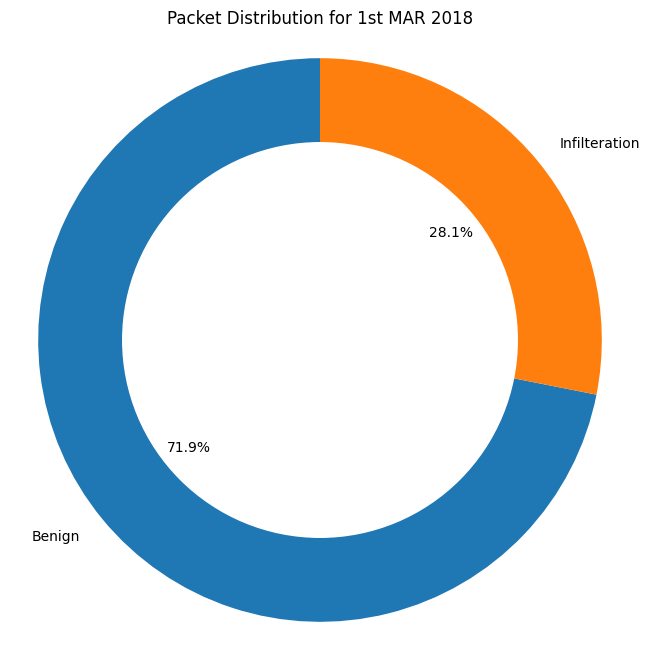

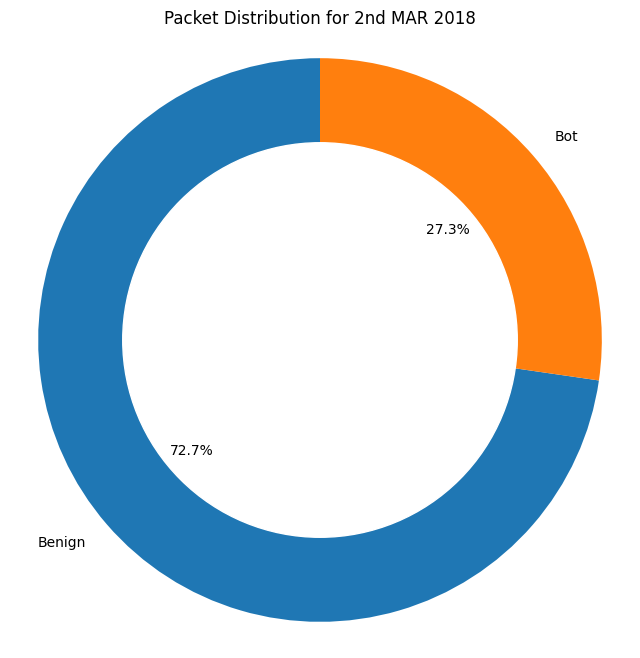



CPU times: user 1.93 s, sys: 45.5 ms, total: 1.98 s
Wall time: 1.98 s


In [18]:
%%time
# Loop through the sorted DataFrame names
for df_name in sorted_df_names:
    # Extract the raw date string (e.g., '02142018').
    raw_date_str = df_name.replace('ids_data_', '')

    # Convert to datetime object and format for the title.
    date_obj = pd.to_datetime(raw_date_str, format='%m%d%Y')
    day_with_suffix = get_day_suffix(date_obj.day)
    formatted_date_str = f"{day_with_suffix} {date_obj.strftime('%b').upper()} {date_obj.year}"

    # Call visualizePie, passing the DataFrame and the formatted date string for the title.
    visualizePie(network_datasets[df_name], formatted_date_str)

    # Add spacing between plots.
    print("\n")

## **Data Preprocessing**

### **Drop Infinate and Null**

In [19]:
def dropInfinateNull(df):
    """
    Handles infinite and null values in a DataFrame by replacing infinities with NaNs
    and then dropping rows containing any NaN values.

    Args:
        df (pd.DataFrame): The input DataFrame to process.

    Returns:
        pd.DataFrame: The DataFrame after cleaning infinite and null values.
    """
    # Print the DataFrame's shape (rows, columns) before processing.
    print ("Shape before dropping NaNs/Infinities: ", df.shape)

    # Replace string representations of infinity with actual NumPy infinity.
    df = df.replace(["Infinity", "infinity"], np.inf)
    # Replace both positive and negative NumPy infinities with NaN (Not a Number).
    df = df.replace([np.inf, -np.inf], np.nan)

    # Drop all rows that contain any NaN values directly from the DataFrame.
    # 'inplace=True' modifies the DataFrame directly without needing re-assignment.
    df.dropna(inplace=True)

    # Print the DataFrame's shape after processing.
    print ("Shape after dropping NaNs/Infinities: ", df.shape)

    # Return the modified DataFrame.
    return df

In [20]:
%%time
# Loop through each DataFrame name in your sorted list.
for df_name in sorted_df_names:
    print(f"\nPre Processing {df_name}:")
    # Apply the dropInfinateNull function to the current DataFrame
    # and update the dictionary with the cleaned DataFrame.
    network_datasets[df_name] = dropInfinateNull(network_datasets[df_name])


Pre Processing ids_data_02142018:
Shape before dropping NaNs/Infinities:  (1048575, 80)
Shape after dropping NaNs/Infinities:  (1044751, 80)

Pre Processing ids_data_02152018:
Shape before dropping NaNs/Infinities:  (1048575, 80)
Shape after dropping NaNs/Infinities:  (1040548, 80)

Pre Processing ids_data_02162018:
Shape before dropping NaNs/Infinities:  (1048574, 80)
Shape after dropping NaNs/Infinities:  (1048574, 80)

Pre Processing ids_data_02202018:
Shape before dropping NaNs/Infinities:  (7948748, 80)
Shape after dropping NaNs/Infinities:  (7889295, 80)

Pre Processing ids_data_02212018:
Shape before dropping NaNs/Infinities:  (1048575, 80)
Shape after dropping NaNs/Infinities:  (1048575, 80)

Pre Processing ids_data_02222018:
Shape before dropping NaNs/Infinities:  (1048575, 80)
Shape after dropping NaNs/Infinities:  (1042965, 80)

Pre Processing ids_data_02232018:
Shape before dropping NaNs/Infinities:  (1048575, 80)
Shape after dropping NaNs/Infinities:  (1042867, 80)

Pre P

### **Drop Unnecessary Column**

In [21]:
def dropUnnecessaryColumn(df):
    """
    Drops the 'Timestamp' column from the DataFrame if it exists.

    Args:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        pd.DataFrame: The DataFrame after attempting to drop the 'Timestamp' column.
    """
    # Check if 'Timestamp' column exists before attempting to drop.
    if "Timestamp" in df.columns:
        # Drop the 'Timestamp' column in-place (modifies the DataFrame directly).
        df.drop(columns="Timestamp", inplace=True)
        print("Timestamp column dropped. New shape: ", df.shape)
    else:
        print("Timestamp column not found. DataFrame shape: ", df.shape)

    # Return the modified DataFrame.
    return df

In [22]:
%%time
# Loop through each DataFrame name in your sorted list.
for df_name in sorted_df_names:
    print(f"\nProcessing {df_name}:")
    # Apply the dropUnnecessaryColumn function to the current DataFrame
    # and update the dictionary with the modified DataFrame.
    network_datasets[df_name] = dropUnnecessaryColumn(network_datasets[df_name])


Processing ids_data_02142018:
Timestamp column dropped. New shape:  (1044751, 79)

Processing ids_data_02152018:
Timestamp column dropped. New shape:  (1040548, 79)

Processing ids_data_02162018:
Timestamp column dropped. New shape:  (1048574, 79)

Processing ids_data_02202018:
Timestamp column dropped. New shape:  (7889295, 79)

Processing ids_data_02212018:
Timestamp column dropped. New shape:  (1048575, 79)

Processing ids_data_02222018:
Timestamp column dropped. New shape:  (1042965, 79)

Processing ids_data_02232018:
Timestamp column dropped. New shape:  (1042867, 79)

Processing ids_data_02282018:
Timestamp column dropped. New shape:  (606902, 79)

Processing ids_data_03012018:
Timestamp column dropped. New shape:  (328181, 79)

Processing ids_data_03022018:
Timestamp column dropped. New shape:  (1044525, 79)
CPU times: user 923 ms, sys: 480 ms, total: 1.4 s
Wall time: 1.39 s


### **Transform Target Label into Binary Class**

In [23]:
%%time
def transformTargetLabelToBinary(df):
    """
    Transforms the 'Label' column into a binary classification (Benign/Malicious).

    Args:
        df (pd.DataFrame): The input DataFrame containing a 'Label' column.

    Returns:
        pd.DataFrame: The DataFrame with the 'Label' column transformed to binary values.
    """
    # Convert the 'Label' column to a binary format: 'Benign' remains 'Benign',
    # all other labels become 'Malicious'.
    df['Label'] = df['Label'].apply(lambda x: "Benign" if x == 'Benign' else "Malicious")

    # Print the unique values in the 'Label' column after transformation.
    print(df['Label'].unique())

    # Print the counts of each unique value in the 'Label' column.
    print(df['Label'].value_counts())

    # Return the DataFrame with the transformed 'Label' column.
    return df

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs


In [24]:
%%time
# Loop through each DataFrame name in your sorted list.
for df_name in sorted_df_names:
    print(f"\nProcessing {df_name}:")
    # Apply the transformTargetLabelToBinary function to the current DataFrame
    # and update the dictionary with the transformed DataFrame.
    network_datasets[df_name] = transformTargetLabelToBinary(network_datasets[df_name])


Processing ids_data_02142018:
['Benign' 'Malicious']
Label
Benign       663808
Malicious    380943
Name: count, dtype: int64

Processing ids_data_02152018:
['Benign' 'Malicious']
Label
Benign       988050
Malicious     52498
Name: count, dtype: int64

Processing ids_data_02162018:
['Benign' 'Malicious']
Label
Malicious    601802
Benign       446772
Name: count, dtype: int64

Processing ids_data_02202018:
['Benign' 'Malicious']
Label
Benign       7313104
Malicious     576191
Name: count, dtype: int64

Processing ids_data_02212018:
['Benign' 'Malicious']
Label
Malicious    687742
Benign       360833
Name: count, dtype: int64

Processing ids_data_02222018:
['Benign' 'Malicious']
Label
Benign       1042603
Malicious        362
Name: count, dtype: int64

Processing ids_data_02232018:
['Benign' 'Malicious']
Label
Benign       1042301
Malicious        566
Name: count, dtype: int64

Processing ids_data_02282018:
['Benign' 'Malicious']
Label
Benign       538666
Malicious     68236
Name: count,

### **Data Balancing**

In [25]:
def balanceData(df):
    """
    Balances the DataFrame by performing random undersampling on the 'Label' column.
    It reduces the number of samples in the majority class(es).

    Args:
        df (pd.DataFrame): The input DataFrame, expected to have a 'Label' column.

    Returns:
        pd.DataFrame: The DataFrame after applying undersampling to balance classes.
    """
    # Separate features (X) and target (y) from the DataFrame.
    # X contains all columns except 'Label'.
    X = df.drop(["Label"], axis=1)
    # y contains only the 'Label' column.
    y = df["Label"]

    # Initialize the RandomUnderSampler.
    # This strategy undersamples the majority class(es) by randomly picking samples with replacement.
    rus = RandomUnderSampler()

    # Apply undersampling to balance the dataset.
    # X_balanced contains the undersampled features, y_balanced contains the corresponding labels.
    # (Note: Instead of creating X, y variables, you could directly pass
    # X_balanced, y_balanced = rus.fit_resample(df.drop(["Label"], axis=1), df["Label"])
    # but creating X and y first often improves readability and debugging.)
    X_balanced, y_balanced = rus.fit_resample(X, y)

    # Recombine the balanced features and target into a single DataFrame.
    df = pd.concat([X_balanced, y_balanced], axis=1)

    # Delete temporary variables to free up memory, which is good practice for large datasets.
    del X, y, X_balanced, y_balanced

    # Print the new shape of the DataFrame after balancing.
    print ("Shape after balancing: ", df.shape)
    # Print the value counts of the 'Label' column to show the balanced distribution.
    print("Label distribution after balancing:\n", df['Label'].value_counts())

    # Return the balanced DataFrame.
    return df

In [26]:
%%time
# Loop through each DataFrame name in your sorted list.
for df_name in sorted_df_names:
    print(f"\nProcessing {df_name}:")
    # Apply the balanceData function to the current DataFrame
    # and update the dictionary with the balanced DataFrame.
    network_datasets[df_name] = balanceData(network_datasets[df_name])


Processing ids_data_02142018:
Shape after balancing:  (761886, 79)
Label distribution after balancing:
 Label
Benign       380943
Malicious    380943
Name: count, dtype: int64

Processing ids_data_02152018:
Shape after balancing:  (104996, 79)
Label distribution after balancing:
 Label
Benign       52498
Malicious    52498
Name: count, dtype: int64

Processing ids_data_02162018:
Shape after balancing:  (893544, 79)
Label distribution after balancing:
 Label
Benign       446772
Malicious    446772
Name: count, dtype: int64

Processing ids_data_02202018:
Shape after balancing:  (1152382, 79)
Label distribution after balancing:
 Label
Benign       576191
Malicious    576191
Name: count, dtype: int64

Processing ids_data_02212018:
Shape after balancing:  (721666, 79)
Label distribution after balancing:
 Label
Benign       360833
Malicious    360833
Name: count, dtype: int64

Processing ids_data_02222018:
Shape after balancing:  (724, 79)
Label distribution after balancing:
 Label
Benign  

## **Data Concatenation**

In [27]:
%%time
import gc # Import the garbage collection module

# Create an empty list to hold the DataFrames for concatenation.
dataframes_to_concat = []

# Loop through the sorted DataFrame names.
# This ensures that the DataFrames are added to the list in chronological order,
# which is good practice for time-series-like data.
for df_name in sorted_df_names:
    # Append each DataFrame from the network_datasets dictionary to the list.
    dataframes_to_concat.append(network_datasets[df_name])
    print(f"Added '{df_name}' to concatenation list.")

# Concatenate all DataFrames in the list vertically (axis=0).
# This is more efficient than repeated concatenations as it performs the operation once.
print("\nConcatenating all datasets...")
network_data = pd.concat(dataframes_to_concat, axis=0)
print("Concatenation complete.")

# Reset the DataFrame index after concatenation.
# 'drop=True' prevents the old index from being added as a new column.
# 'inplace=True' modifies the DataFrame directly.
print("Resetting index...")
network_data.reset_index(drop=True, inplace=True)
print("Index reset.")

# Delete the 'network_datasets' dictionary to free up memory.
# This removes the reference to the individual DataFrames.
print("Deleting 'network_datasets' dictionary...")
del network_datasets
print("'network_datasets' deleted.")

# Explicitly enforce garbage collection.
# This attempts to free up memory immediately, which can be useful for very large objects.
print("Enforcing garbage collection...")
gc.collect()
print("Garbage collection enforced.")

# Print the shape of the final concatenated DataFrame to verify.
print("\nFinal concatenated DataFrame shape:", network_data.shape)


Added 'ids_data_02142018' to concatenation list.
Added 'ids_data_02152018' to concatenation list.
Added 'ids_data_02162018' to concatenation list.
Added 'ids_data_02202018' to concatenation list.
Added 'ids_data_02212018' to concatenation list.
Added 'ids_data_02222018' to concatenation list.
Added 'ids_data_02232018' to concatenation list.
Added 'ids_data_02282018' to concatenation list.
Added 'ids_data_03012018' to concatenation list.
Added 'ids_data_03022018' to concatenation list.

Concatenating all datasets...
Concatenation complete.
Resetting index...
Index reset.
Deleting 'network_datasets' dictionary...
'network_datasets' deleted.
Enforcing garbage collection...
Garbage collection enforced.

Final concatenated DataFrame shape: (4529990, 79)
CPU times: user 750 ms, sys: 5.33 ms, total: 755 ms
Wall time: 742 ms


In [28]:
#temp_network_data = network_data
#network_data = temp_network_data
network_data['Label'].value_counts()

Label
Benign       2264995
Malicious    2264995
Name: count, dtype: int64

## **Feature Selection**

### **Drop Constant Column**

In [29]:
%%time
# Calculate the variance for all numeric columns in the DataFrame.
# Columns with zero variance are constant (all values are the same).
variances = network_data.var(numeric_only=True)

# Identify columns where the variance is exactly zero.
constant_columns = variances[variances == 0].index

# Drop the identified constant columns from the DataFrame.
# axis=1 specifies that columns should be dropped.
network_data = network_data.drop(constant_columns, axis=1)

# Print the names of the columns that were dropped.
print("Constant columns dropped:", constant_columns)

# Print the new shape of the DataFrame after dropping constant columns.
print("New DataFrame shape:", network_data.shape)

Constant columns dropped: Index(['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg',
       'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg',
       'Bwd Blk Rate Avg'],
      dtype='object')
New DataFrame shape: (4529990, 71)
CPU times: user 932 ms, sys: 181 ms, total: 1.11 s
Wall time: 1.11 s


### **Check and Drop Duplicate Column**

In [30]:
%%time
# Initialize a set to store the names of duplicate columns. Using a set
# ensures that each column name is stored only once.
duplicates = set()

# Iterate through each column in the DataFrame using its index.
for i in range(0, len(network_data.columns)):
    col1 = network_data.columns[i] # Get the name of the current column (column 1).

    # For each column1, iterate through the remaining columns (to its right)
    # starting from the next column (i+1) to avoid redundant comparisons
    # and comparing a column with itself.
    for j in range(i + 1, len(network_data.columns)):
        col2 = network_data.columns[j] # Get the name of the second column (column 2).

        # Check if the content of col1 is exactly equal to the content of col2.
        # The .equals() method is used for element-wise comparison of Series,
        # including data types and order.
        if network_data[col1].equals(network_data[col2]):
            # If they are duplicates, add the name of the second column (col2)
            # to the 'duplicates' set. We add col2 because we want to keep col1.
            duplicates.add(col2)

# Print the set of identified duplicate column names.
print(duplicates)

# Drop all columns identified as duplicates from the DataFrame.
# 'axis=1' specifies that columns should be dropped.
# 'inplace=True' modifies the DataFrame directly without creating a new one.
network_data.drop(columns=list(duplicates), axis=1, inplace=True) # Convert set to list for drop()

# Print the new shape of the DataFrame after dropping duplicate columns.
print(network_data.shape)

{'SYN Flag Cnt', 'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'CWE Flag Count', 'Subflow Fwd Pkts'}
(4529990, 66)
CPU times: user 5.98 s, sys: 14.3 ms, total: 6 s
Wall time: 5.97 s


### **Encode Target Label**

In [31]:
%%time
# Encode the 'Label' column from string values to binary numerical values.
# 'Benign' is mapped to 0, and all other labels (which should be 'Malicious' after previous steps) are mapped to 1.
network_data['Label'] = network_data['Label'].apply(lambda x: 0 if x == 'Benign' else 1)

# Print the unique values present in the 'Label' column after encoding,
# to confirm the transformation to 0 and 1.
print("Unique labels after binary encoding:", network_data['Label'].unique())

Unique labels after binary encoding: [0 1]
CPU times: user 916 ms, sys: 2.74 ms, total: 918 ms
Wall time: 908 ms


### **Drop Column Based on Correlations**

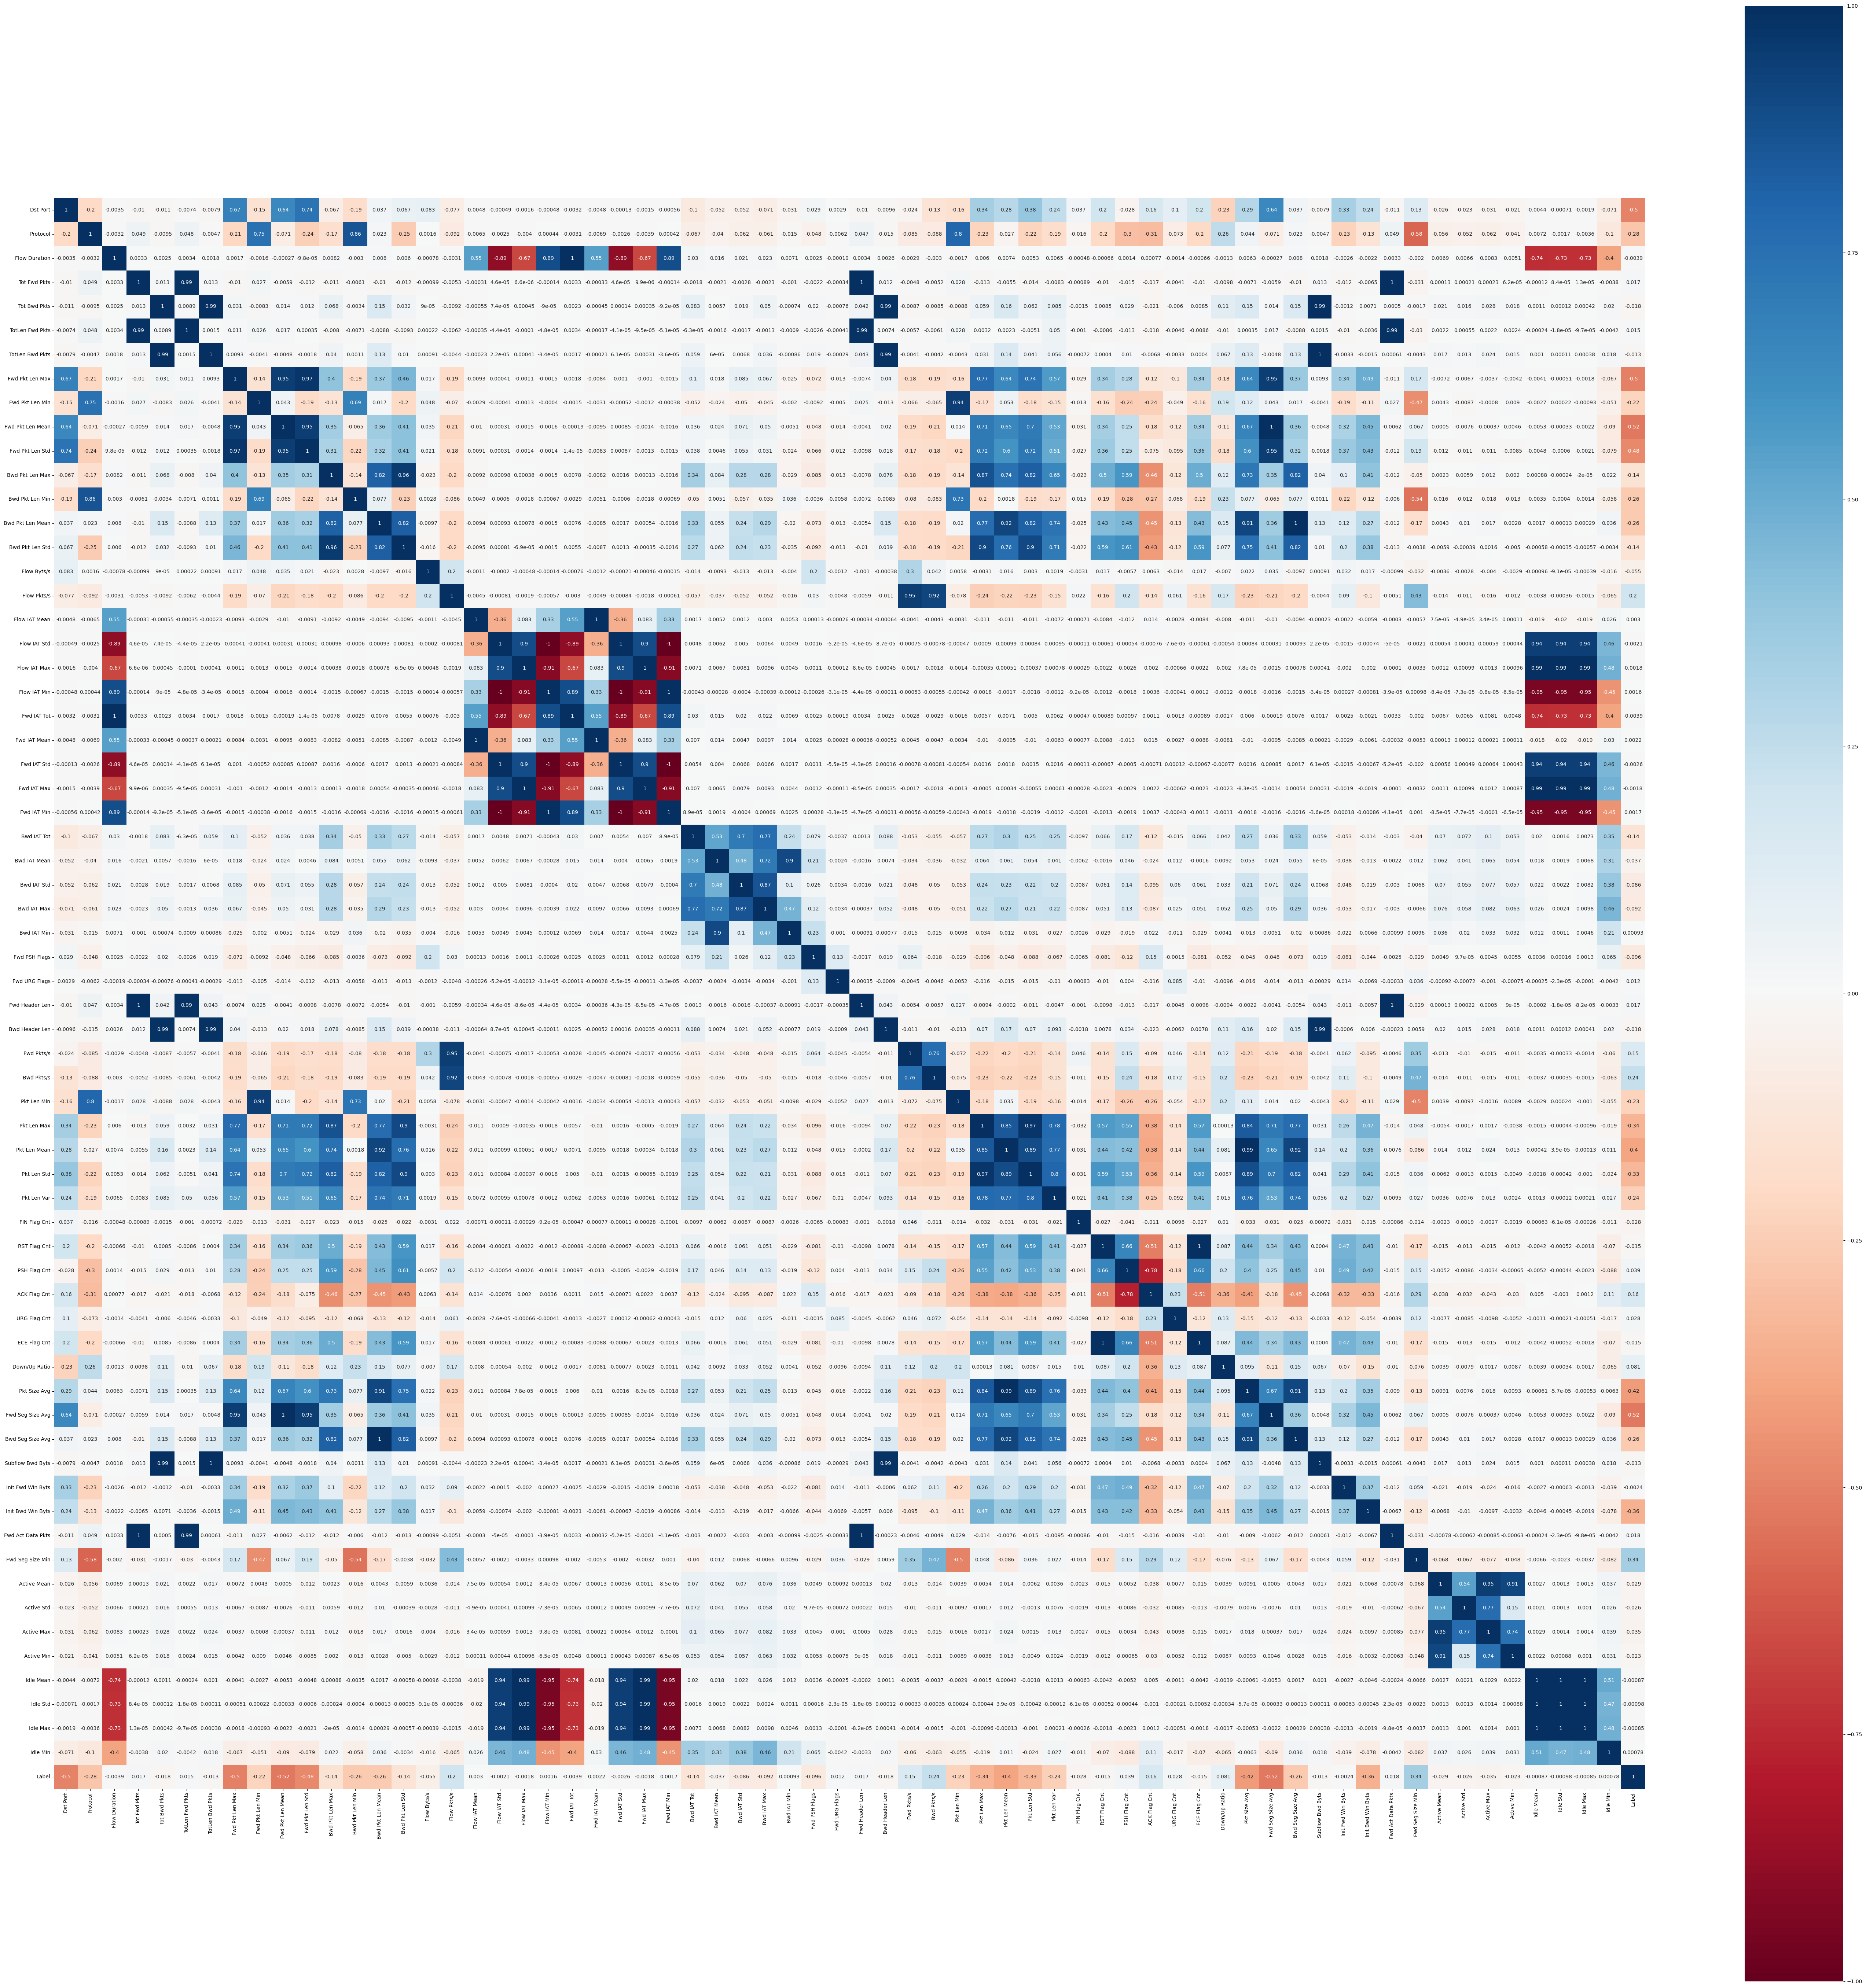

CPU times: user 45.4 s, sys: 411 ms, total: 45.8 s
Wall time: 45.6 s


In [32]:
%%time
# Create a large figure to accommodate the heatmap, especially for many features.
# A size of 70x70 is very large, suitable for hundreds of features if annotations are read.
plt.figure(figsize=(70, 70))

# Calculate the Pearson correlation matrix for all numeric columns in the DataFrame.
# This matrix shows the linear relationship between each pair of features.
corr = network_data.corr(numeric_only=True)

# Generate a heatmap visualization of the correlation matrix:
# - annot=True: Displays the correlation values on the heatmap cells.
# - cmap='RdBu': Uses a diverging colormap, good for showing positive (red) and negative (blue) correlations.
# - vmin=-1, vmax=1: Sets the color bar limits to the full range of correlation coefficients.
# - square=True: Ensures each cell in the heatmap is square, maintaining aspect ratio.
sns.heatmap(corr, annot=True, cmap='RdBu', vmin=-1, vmax=1, square=True)

# Display the generated heatmap.
plt.show()

In [33]:
%%time
# Initialize a set to store names of highly correlated columns to be removed.
correlated_col = set()

# Initialize a boolean list to track if a column (by index) is still considered for retention.
# Initially, all columns are considered.
is_correlated = [True] * len(corr.columns)

# Set the correlation threshold. Columns with an absolute correlation above this will be considered redundant.
threshold = 0.90

# Iterate through the correlation matrix.
for i in range(len(corr.columns)):
    # Only process column 'i' if it hasn't already been marked for removal (as a duplicate of a previous column).
    if is_correlated[i]:
        # Compare column 'i' with all preceding columns 'j'.
        for j in range(i):
            # Check if the absolute correlation between col 'i' and col 'j' is above the threshold,
            # and if col 'j' is still considered for retention.
            if (abs(corr.iloc[i, j]) >= threshold) and is_correlated[j]:
                # If highly correlated, mark column 'j' for removal and add its name to the set.
                colname = corr.columns[j]
                is_correlated[j] = False  # Mark col 'j' as no longer to be considered for retention
                correlated_col.add(colname) # Add col 'j' to the list of columns to drop

# Print the set of identified highly correlated columns.
print(correlated_col)
# Print the number of identified highly correlated columns.
print(len(correlated_col))

{'Fwd IAT Max', 'Bwd IAT Mean', 'Fwd IAT Std', 'Idle Std', 'Pkt Size Avg', 'Flow Duration', 'Fwd IAT Min', 'Active Mean', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Flow IAT Std', 'Flow IAT Max', 'Idle Mean', 'Fwd Header Len', 'TotLen Fwd Pkts', 'Tot Bwd Pkts', 'RST Flag Cnt', 'Flow IAT Min', 'Fwd Pkt Len Mean', 'Bwd Pkt Len Mean', 'Bwd Header Len', 'Pkt Len Max', 'Flow IAT Mean', 'Bwd Pkt Len Std', 'Bwd Pkt Len Max', 'Pkt Len Mean', 'Tot Fwd Pkts', 'Flow Pkts/s', 'TotLen Bwd Pkts', 'Fwd Pkt Len Std'}
30
CPU times: user 28.8 ms, sys: 0 ns, total: 28.8 ms
Wall time: 28.5 ms


In [34]:
%%time
# Drop the highly correlated columns identified in the previous step from the DataFrame.
# 'correlated_col' is a set containing the names of columns to be dropped.
# 'axis=1' specifies that columns should be dropped.
# 'inplace=True' modifies the DataFrame directly without returning a new one.
network_data.drop(columns=list(correlated_col), axis=1, inplace=True) # Ensure correlated_col is converted to a list for .drop()

# Print the new shape (rows, columns) of the DataFrame after dropping the columns.
print(network_data.shape)

(4529990, 36)
CPU times: user 173 ms, sys: 16.9 ms, total: 190 ms
Wall time: 189 ms


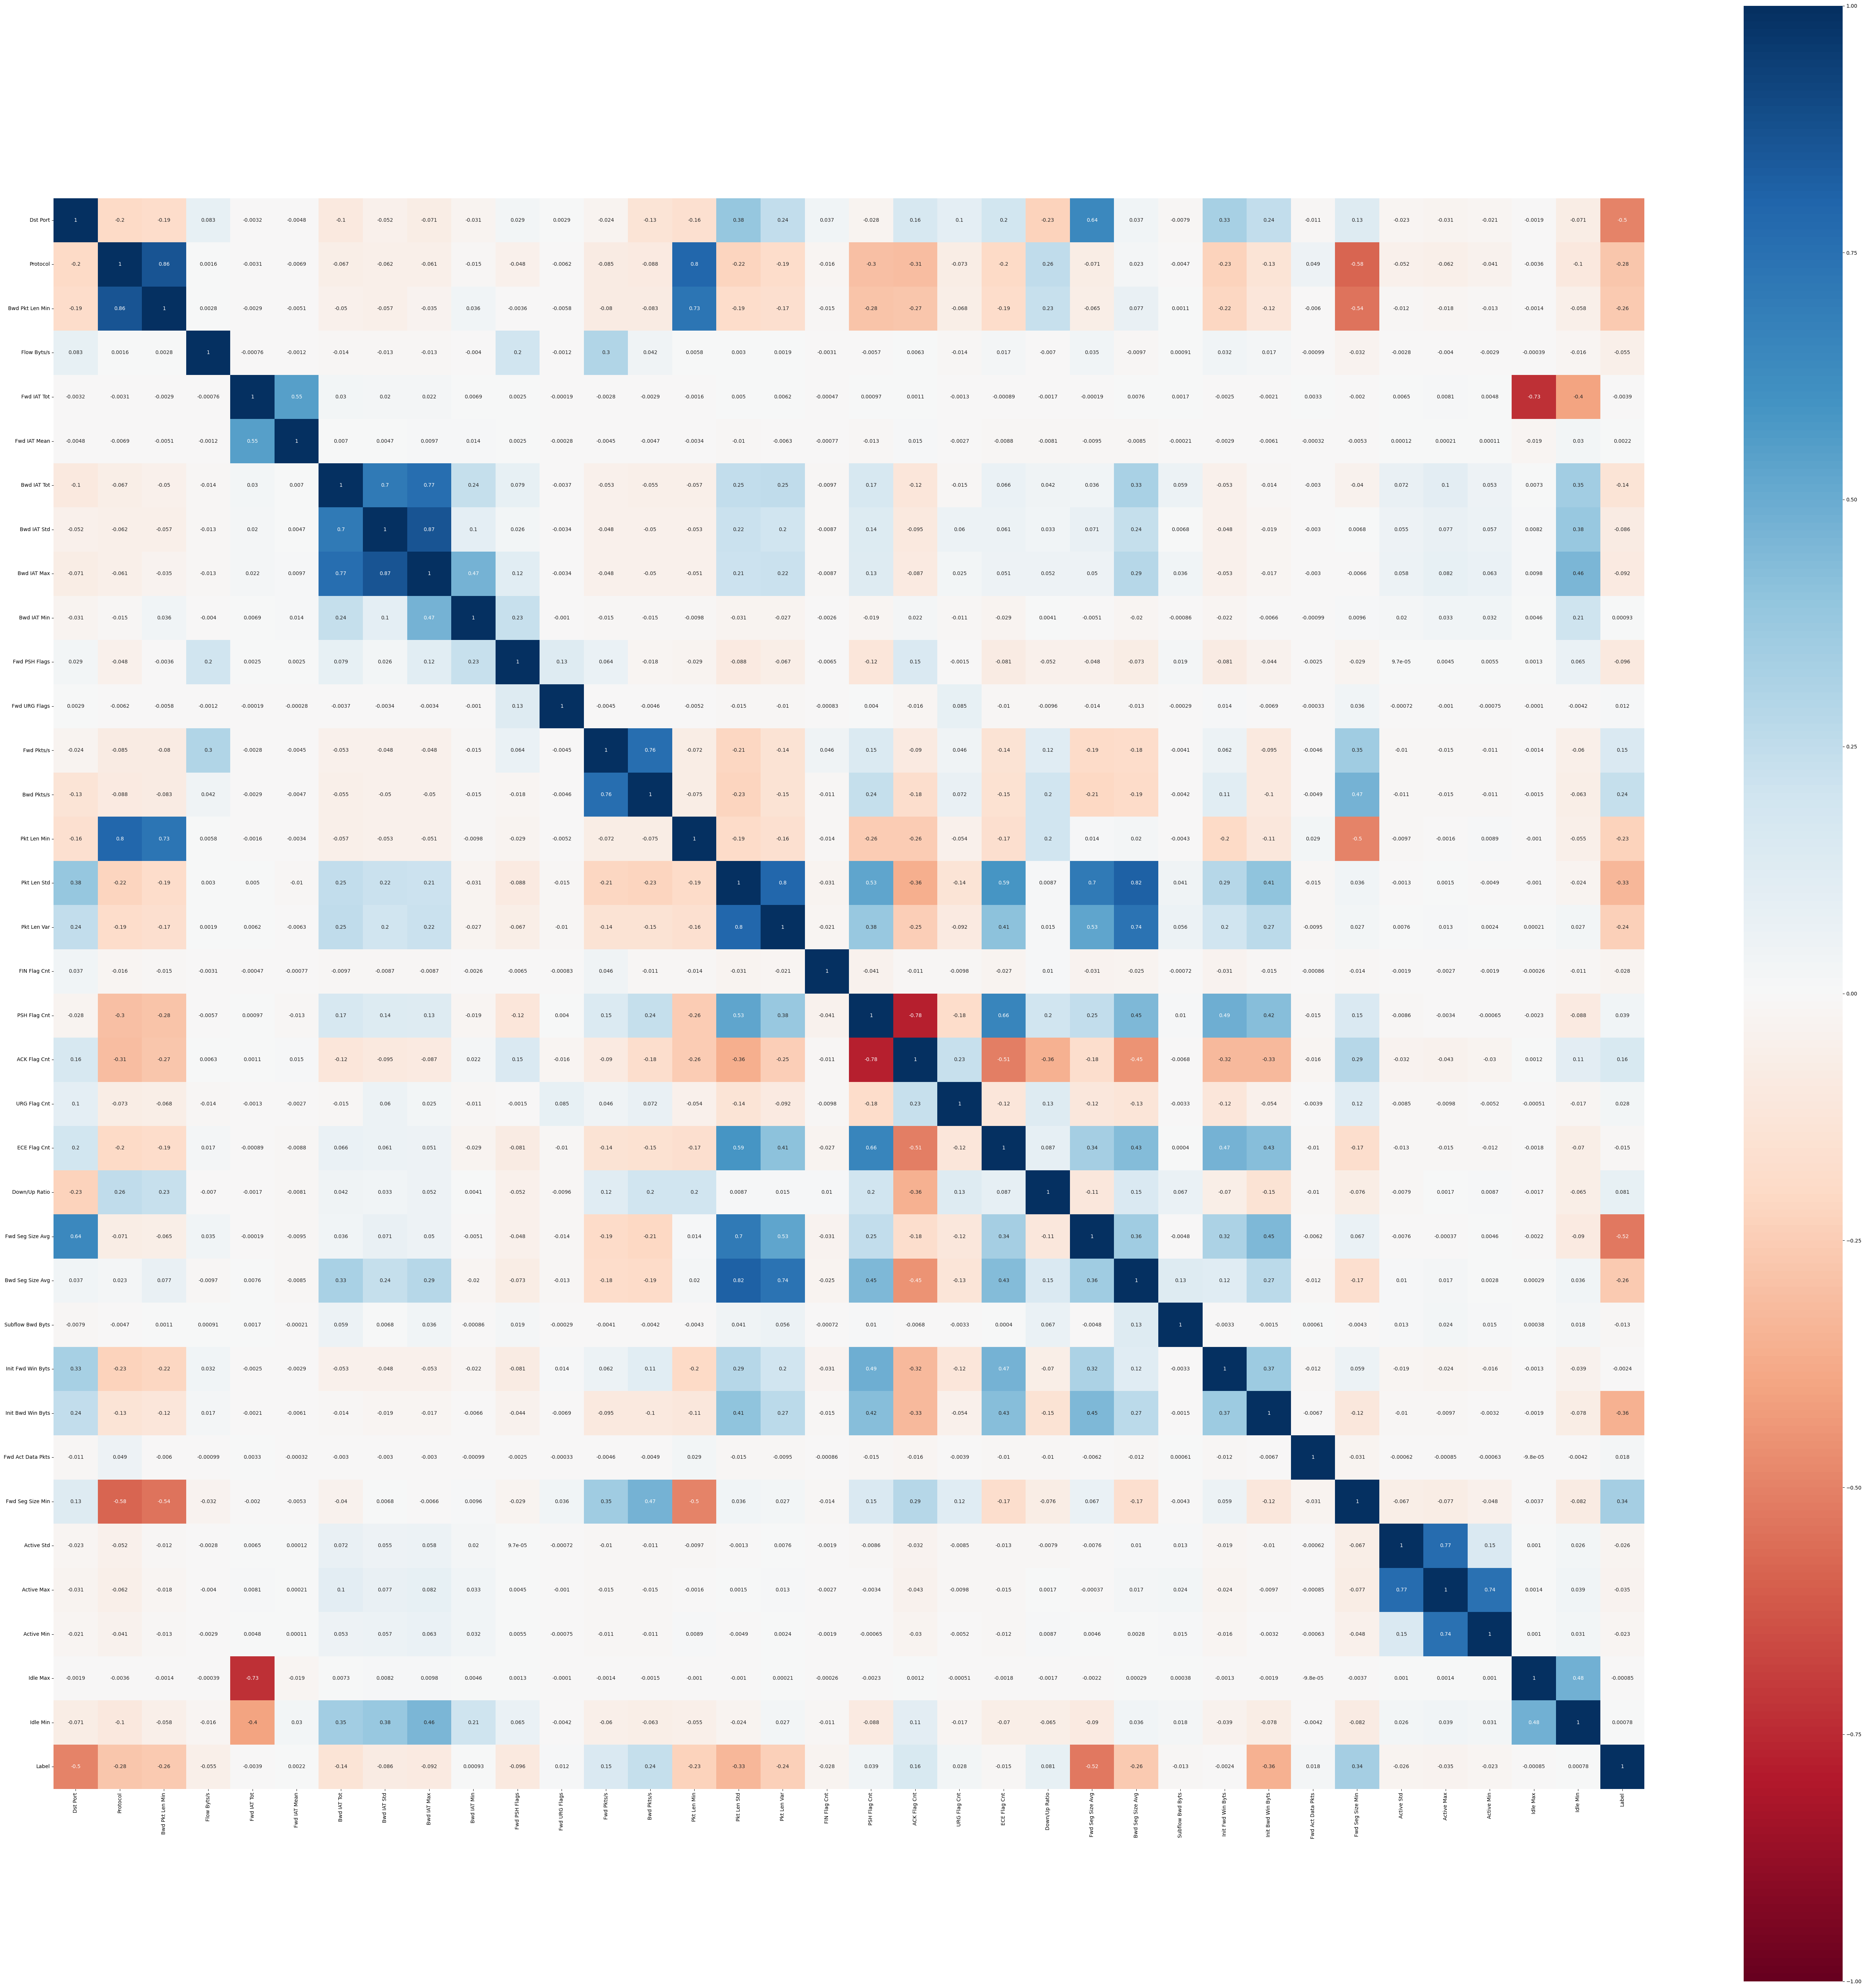

CPU times: user 13.9 s, sys: 179 ms, total: 14.1 s
Wall time: 14 s


In [35]:
%%time
# pearson correlation heatmap
plt.figure(figsize=(70, 70))
corr = network_data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='RdBu', vmin=-1, vmax=1, square=True) # annot=True
plt.show()

### **Save Cleaned Feature Data**

In [36]:
folder_path = '/content/drive/MyDrive/CSE-CIC-IDS2018'
output_file_name = 'cleaned_features.csv'

# Construct the full file path
output_file_path = f'{folder_path}/{output_file_name}'

# Save the DataFrame to the specified path in Google Drive
network_data.to_csv(output_file_path, index=False)

print(f"DataFrame successfully saved to: {output_file_path}")

DataFrame successfully saved to: /content/drive/MyDrive/CSE-CIC-IDS2018/cleaned_features.csv


### **Sequential Feature Selection**

In [37]:
%%time
# split data into features and target
X=network_data.drop(["Label"], axis=1)
y=network_data["Label"]

CPU times: user 165 ms, sys: 0 ns, total: 165 ms
Wall time: 164 ms


#### **Backward Feature Selection**

In [39]:
%%time
# Initialize a Decision Tree Classifier as the estimator for feature selection.
dt = DecisionTreeClassifier()

# Perform Backward Feature Selection:
# - Starts with all features and iteratively removes the least useful one.
# - The goal is to select the 'n_features_to_select' best features.
# - 'n_features_to_select=30': Aims to reduce the dataset to 30 features.
# - 'direction="backward"': Specifies backward elimination.
# - '.fit(X, y)': Executes the feature selection process on the feature matrix X and target vector y.
sfs_backward = SequentialFeatureSelector(
    dt, n_features_to_select=30, direction="backward", n_jobs=-1 # Add n_jobs=-1 here
).fit(X, y)

CPU times: user 3min 4s, sys: 2min 1s, total: 5min 5s
Wall time: 4h 41min 1s


In [40]:
# Retrieve the names of the selected features.
# sfs_backward.get_support() returns a boolean mask indicating which features were selected (True) or not (False).
# Applying this boolean mask to X.columns (your original feature names) extracts only the names
# corresponding to 'True' values.
selected_features = X.columns[sfs_backward.get_support()]

# Print the list of feature names that were selected by the SequentialFeatureSelector.
print(selected_features)

Index(['Protocol', 'Flow Byts/s', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd URG Flags',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Std', 'Pkt Len Var',
       'FIN Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'ECE Flag Cnt', 'Down/Up Ratio', 'Bwd Seg Size Avg', 'Subflow Bwd Byts',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts',
       'Fwd Seg Size Min', 'Active Std', 'Active Max', 'Active Min',
       'Idle Max', 'Idle Min'],
      dtype='object')


In [41]:
# Convert the pandas Index of selected features to a Python list.
# This makes it mutable, allowing us to add new elements.
selected_features = selected_features.tolist()

# Add the target column 'Label' to the list of selected features.
# This is crucial because the feature selection was performed only on 'X' (features),
# but for training and analysis, the target variable 'Label' must also be included.
selected_features.append('Label')

# Convert the modified list back into a pandas Index object.
# This is often done for consistency if other DataFrame operations expect an Index,
# or simply to maintain the data structure from before the '.tolist()' conversion.
selected_features = pd.Index(selected_features)

# Print the final list of column names, now including the target 'Label'.
print(selected_features)

Index(['Protocol', 'Flow Byts/s', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd URG Flags',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Std', 'Pkt Len Var',
       'FIN Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'ECE Flag Cnt', 'Down/Up Ratio', 'Bwd Seg Size Avg', 'Subflow Bwd Byts',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts',
       'Fwd Seg Size Min', 'Active Std', 'Active Max', 'Active Min',
       'Idle Max', 'Idle Min', 'Label'],
      dtype='object')


In [43]:
%%time
import gc

# Selects only the columns specified in `selected_features` from `network_data`.
# The `.loc` accessor is used for label-based indexing.
# This effectively reduces the DataFrame to include only the features chosen
# by the Sequential Feature Selector and the 'Label' column.
network_data = network_data.loc[:, selected_features]

# Delete the original feature matrix (X) and target vector (y) to free up memory.
# These objects are no longer needed after feature selection is applied to the main DataFrame.
del X, y

# Explicitly call the garbage collector to reclaim memory from deleted objects.
gc.collect()

# Display the head of the modified `network_data` DataFrame.
network_data

CPU times: user 6.57 s, sys: 597 ms, total: 7.17 s
Wall time: 7.2 s


Protocol    Flow Byts/s  Fwd IAT Tot  Fwd IAT Mean   Bwd IAT Std  \
0               6    1058.574069      3676644  3.676644e+05  5.174318e+05   
1              17    5905.049488        24574  2.457400e+04  0.000000e+00   
2               6  426390.403490          445  2.225000e+02  1.894131e+02   
3               6  970104.633782          398  1.990000e+02  1.550946e+02   
4               6      74.750367     60615087  4.662699e+06  1.746692e+07   
...           ...            ...          ...           ...           ...   
4529985         0       0.000000         9487  1.054111e+03  0.000000e+00   
4529986         6       0.000000      1030059  3.433530e+05  0.000000e+00   
4529987         6       0.000000      1029998  3.433327e+05  0.000000e+00   
4529988         6       0.000000      1030017  3.433390e+05  0.000000e+00   
4529989         6       0.000000      1030836  3.436120e+05  0.000000e+00   

         Bwd IAT Max  Bwd IAT Min  Fwd PSH Flags  Fwd URG Flags   Bwd Pkts/s  \
0            1455373        75502              0              0     2.175897   
1                 19           19              0              0    67.102835   
2                407           31              0              0  4362.050164   
3                310            1              0              0  5979.073244   
4           57991011            0              0              0     0.197971   
...              ...          ...            ...            ...          ...   
4529985            0            0              0              0     0.000000   
4529986       515615       515615              0              0     1.941636   
4529987       515621       515621              0              0     1.941751   
4529988       515643       515643              0              0     1.941716   
4529989       515608       515608              0              0     1.940173   

         ...  Init Fwd Win Byts  Init Bwd Win Byts  Fwd Act Data Pkts  \
0        ...               8192              62862                  5   
1        ...                 -1                 -1                  1   
2        ...               8192                149                  1   
3        ...               8192                149                  1   
4        ...               8192                180                  7   
...      ...                ...                ...                ...   
4529985  ...                 -1                 -1                  0   
4529986  ...               8192               8192                  0   
4529987  ...               8192               8192                  0   
4529988  ...               8192               8192                  0   
4529989  ...               8192               8192                  0   

         Fwd Seg Size Min  Active Std  Active Max  Active Min  Idle Max  \
0                      20         0.0           0           0         0   
1                       8         0.0           0           0         0   
2                      20         0.0           0           0         0   
3                      20         0.0           0           0         0   
4                      20         0.0      698464      698464  57895362   
...                   ...         ...         ...         ...       ...   
4529985                 0         0.0           0           0         0   
4529986                20         0.0           0           0         0   
4529987                20         0.0           0           0         0   
4529988                20         0.0           0           0         0   
4529989                20         0.0           0           0         0   

         Idle Min  Label  
0               0      0  
1               0      0  
2               0      0  
3               0      0  
4        57895362      0  
...           ...    ...  
4529985         0      1  
4529986         0      1  
4529987         0      1  
4529988         0      1  
4529989         0      1  

[4529990 rows x 31 c

### **Data Normalization**

In [46]:
%%time
# Define a list containing the names of all numeric columns that will be used for scaling.
# This list is manually specified based on the expected numerical features in the dataset
# after previous preprocessing steps.
# The commented-out line `numeric_cols = network_data.select_dtypes(include=[np.number]).columns.tolist()`
# shows an alternative, dynamic way to get numeric columns, but a hardcoded list
# is used here, possibly to ensure a specific set of features or if dtypes might vary.
numeric_cols = ['Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg',
       'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg',
       'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts',
       'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts',
       'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max',
       'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']

# Filter numeric_cols to only include columns present in network_data
numeric_cols = [col for col in numeric_cols if col in network_data.columns]


# Print the list of numeric column names.
print(numeric_cols)

['Flow Byts/s', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd URG Flags', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'ECE Flag Cnt', 'Down/Up Ratio', 'Bwd Seg Size Avg', 'Subflow Bwd Byts', 'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Std', 'Active Max', 'Active Min', 'Idle Max', 'Idle Min']
CPU times: user 201 µs, sys: 23 µs, total: 224 µs
Wall time: 229 µs


In [47]:
%%time
# apply robust normalization
rbst = RobustScaler()
network_data[numeric_cols] = rbst.fit_transform(network_data[numeric_cols])

CPU times: user 9.52 s, sys: 1.85 s, total: 11.4 s
Wall time: 6.98 s


In [48]:
network_data

Protocol  Flow Byts/s  Fwd IAT Tot  Fwd IAT Mean  Bwd IAT Std  \
0               6     0.057192     1.417148      0.954196    19.373501   
1              17     0.420086     0.007986      0.057413     0.000000   
2               6    31.905155    -0.001324     -0.006238     0.007092   
3               6    72.617345    -0.001342     -0.006299     0.005807   
4               6    -0.016475    23.387014     12.180729   653.990209   
...           ...          ...          ...           ...          ...   
4529985         0    -0.022072     0.002165     -0.004064     0.000000   
4529986         6    -0.022072     0.395956      0.890650     0.000000   
4529987         6    -0.022072     0.395932      0.890597     0.000000   
4529988         6    -0.022072     0.395940      0.890614     0.000000   
4529989         6    -0.022072     0.396256      0.891327     0.000000   

         Bwd IAT Max  Bwd IAT Min  Fwd PSH Flags  Fwd URG Flags  Bwd Pkts/s  \
0          22.542603   255.074324            0.0            0.0   -0.000930   
1           0.000294     0.064189            0.0            0.0    0.104674   
2           0.006304     0.104730            0.0            0.0    7.090406   
3           0.004802     0.003378            0.0            0.0    9.720494   
4         898.235947     0.000000            0.0            0.0   -0.004147   
...              ...          ...            ...            ...         ...   
4529985     0.000000     0.000000            0.0            0.0   -0.004469   
4529986     7.986478  1741.942568            0.0            0.0   -0.001311   
4529987     7.986571  1741.962838            0.0            0.0   -0.001311   
4529988     7.986912  1742.037162            0.0            0.0   -0.001311   
4529989     7.986369  1741.918919            0.0            0.0   -0.001313   

         ...  Init Fwd Win Byts  Init Bwd Win Byts  Fwd Act Data Pkts  \
0        ...           0.223348         285.736364                5.0   
1        ...          -0.083990          -0.004545                1.0   
2        ...           0.223348           0.677273                1.0   
3        ...           0.223348           0.677273                1.0   
4        ...           0.223348           0.818182                7.0   
...      ...                ...                ...                ...   
4529985  ...          -0.083990          -0.004545                0.0   
4529986  ...           0.223348          37.236364                0.0   
4529987  ...           0.223348          37.236364                0.0   
4529988  ...           0.223348          37.236364                0.0   
4529989  ...           0.223348          37.236364                0.0   

         Fwd Seg Size Min  Active Std  Active Max  Active Min    Idle Max  \
0                0.000000         0.0         0.0         0.0         0.0   
1               -1.000000         0.0         0.0         0.0         0.0   
2                0.000000         0.0         0.0         0.0         0.0   
3                0.000000         0.0         0.0         0.0         0.0   
4                0.000000         0.0    698464.0    698464.0  57895362.0   
...                   ...         ...         ...         ...         ...   
4529985         -1.666667         0.0         0.0         0.0         0.0   
4529986          0.000000         0.0         0.0         0.0         0.0   
4529987          0.000000         0.0         0.0         0.0         0.0   
4529988          0.000000         0.0         0.0         0.0         0.0   
4529989          0.000000         0.0         0.0         0.0         0.0   

           Idle Min  Label  
0               0.0      0  
1               0.0      0  
2               0.0      0  
3               0.0      0  
4        57895362.0      0  
...             ...    ...  
4529985         0.0      1  
4529986         0.0      1  
4529987         0.0      1  
4529988         0.0      1  
4529989         0.0      1  

[4529990 rows x 31 c

### **Save Final Input Data**

In [49]:
folder_path = '/content/drive/MyDrive/CSE-CIC-IDS2018'
output_file_name = 'final_input_data.csv'

# Construct the full file path
output_file_path = f'{folder_path}/{output_file_name}'

# Save the DataFrame to the specified path in Google Drive
network_data.to_csv(output_file_path, index=False)

print(f"DataFrame successfully saved to: {output_file_path}")

DataFrame successfully saved to: /content/drive/MyDrive/CSE-CIC-IDS2018/final_input_data.csv


# **Classification**
We will be testing against six algorithms mainly

### **Split Data**

In [50]:
%%time
# Separate features (X) and target variable (y) from the DataFrame.
# X will contain all columns except 'Label', which is dropped.
# y will contain only the 'Label' column.
X = network_data.drop(["Label"], axis=1)
y = network_data["Label"]

# Initialize KFold cross-validation splitter.
# 'n_splits=10': The data will be split into 10 folds.
# 'shuffle=True': The data will be shuffled before splitting.
# 'random_state=42': Ensures reproducibility of the shuffle and splits.
kf = KFold(n_splits=10, shuffle=True, random_state=42)

CPU times: user 647 ms, sys: 113 ms, total: 759 ms
Wall time: 376 ms


### **Confusion Metrix HeatMap**

In [51]:
def confusionMatrixHeatMap(cm, title):
    # box lebels
    group_counts = ["{0:0.0f}\n".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    box_labels = [f"{v1}{v2}".strip() for v1, v2 in zip(group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cm.shape[0],cm.shape[1])

    # categories
    categories = ['Benign', 'Malicious']

    # create a heatmap of the confusion matrix
    sns.heatmap(cm, annot=box_labels, fmt='', cmap='Blues', cbar=False, xticklabels=categories, yticklabels=categories)

    # create and add rectangle patch
    ax = plt.gca()
    rect = patches.Rectangle((0, 0), len(cm[0]), len(cm), linewidth=2, edgecolor='black', facecolor='none')
    ax.add_patch(rect)

    # set labels, title, and axis ticks
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    title_font = { 'fontsize': 16, 'fontname': 'Times New Roman' }
    plt.title(title + '\n', **title_font)

    # calculate accuracy and misclassification rate
    total_samples = len(y)
    correct_predictions = sum(y == y_pred)
    incorrect_predictions = total_samples - correct_predictions
    accuracy = correct_predictions / total_samples
    misclassification_rate = incorrect_predictions / total_samples

    # add accuracy and misclassification rate to the heatmap
    plt.text(0.5, -0.1, f'\n\n\nAccuracy: {accuracy:.2f}', ha='center', va='center', transform=plt.gca().transAxes)
    plt.text(0.5, -0.2, f'\nMisclassification Rate: {misclassification_rate:.4f}', ha='center', va='center', transform=plt.gca().transAxes)

    # Show the plot
    plt.show()

## **Decision Tree**

In [ ]:
%%time
# Create an instance of the Decision Tree Classifier model.
dt = DecisionTreeClassifier()

# Generate cross-validated predictions for the Decision Tree model.
# 'cross_val_predict' returns predictions for each sample in 'X' by fitting
# the model on different folds (defined by 'kf') and making predictions.
# 'y_pred' will contain the predicted labels for all samples.
y_pred = cross_val_predict(dt, X, y, cv=kf)

# Print a header indicating the model being evaluated.
print ("Dicision Tree")

# Calculate the Confusion Matrix.
# 'cm' shows the counts of true vs. predicted classifications.
cm = confusion_matrix(y, y_pred)

# Generate a Classification Report.
# 'cr' provides precision, recall, f1-score, and support for each class.
cr = classification_report(y, y_pred)

# Calculate the Area Under the Receiver Operating Characteristic Curve (AUC score).
# 'auc' quantifies the model's ability to distinguish between classes.
auc = roc_auc_score(y, y_pred)

# Print the calculated Confusion Matrix.
print("Confusion Matrix:")
print(cm)

# Print the Classification Report.
print("Performance Matrix:")
print(cr)

# Print the ROC AUC score.
print("AUC:", auc)

# Call the custom function to visualize the confusion matrix as a heatmap
# and display key performance metrics directly on the plot.
confusionMatrixHeatMap(cm, title="Decision Tree")

## **Random Forest**

In [ ]:
%%time
# Create an instance of the Random Forest Classifier model.
# A 'random_state' is set for reproducibility of results.
rf = RandomForestClassifier(random_state=42)

# Generate cross-validated predictions for the Random Forest model.
# 'cross_val_predict' fits the model on different training folds (defined by 'kf')
# and collects predictions for the corresponding validation folds.
# 'y_pred' will contain the predicted labels for all samples in 'X'.
y_pred = cross_val_predict(rf, X, y, cv=kf)

# Print a header to indicate that the Random Forest model's results are being displayed.
print ("Random Forest")

# Calculate the Confusion Matrix.
# 'cm' shows a summary of prediction results, comparing true labels against predicted labels.
cm = confusion_matrix(y, y_pred)

# Generate a Classification Report.
# 'cr' provides a detailed summary of precision, recall, f1-score, and support
# for each class, as well as overall averages.
cr = classification_report(y, y_pred)

# Print the calculated Confusion Matrix.
print("Confusion Matrix:")
print(cm)

# Print the Classification Report.
print("Performance Matrix:")
print(cr)

# Call the custom function to visualize the confusion matrix as a heatmap
confusionMatrixHeatMap(cm, title="Random Forest Confusion Matrix")

## **Light Gradient Boosting Machine (LightGBM)**

In [ ]:
%%time
# Create an instance of the LightGBM Classifier model.
# A 'random_state' is often useful for reproducibility in tree-based models,
# though LGBMClassifier doesn't have a direct 'random_state' parameter in its constructor
# for the overall model, but rather for individual components like 'random_seed' or 'seed'.
# For simplicity and consistency with previous examples, we'll keep it as is,
# but for strict reproducibility, 'random_seed' might be considered.
lgb = LGBMClassifier(random_state=42) # Using random_state for consistency if it's mapped internally or for future versions

# Generate cross-validated predictions for the LightGBM model.
# 'cross_val_predict' fits the model on different training folds (defined by 'kf')
# and collects predictions for the corresponding validation folds.
# 'y_pred' will contain the predicted labels for all samples in 'X'.
y_pred = cross_val_predict(lgb, X, y, cv=kf)

# Print a header to indicate that the LightGBM model's results are being displayed.
print ("LightGBM")

# Calculate the Confusion Matrix.
# 'cm' shows a summary of prediction results, comparing true labels against predicted labels.
cm = confusion_matrix(y, y_pred)

# Generate a Classification Report.
# 'cr' provides a detailed summary of precision, recall, f1-score, and support
# for each class, as well as overall averages.
cr = classification_report(y, y_pred)

# Print the calculated Confusion Matrix.
print("Confusion Matrix:")
print(cm)

# Print the Classification Report.
print("Performance Matrix:")
print(cr)

# Call the custom function to visualize the confusion matrix as a heatmap
confusionMatrixHeatMap(cm, title="LightGBM Confusion Matrix")

## **K-Nearest Neighbors (KNN)**

In [ ]:
%%time
# Create an instance of the K-Nearest Neighbors Classifier model.
# You might consider adding 'n_neighbors' (e.g., n_neighbors=5) for a specific number of neighbors,
# or leave it at default.
knn = KNeighborsClassifier()

# Generate cross-validated predictions for the KNN model.
# 'cross_val_predict' fits the model on different training folds (defined by 'kf')
# and collects predictions for the corresponding validation folds.
# 'y_pred' will contain the predicted labels for all samples in 'X'.
y_pred = cross_val_predict(knn, X, y, cv=kf)

# Print a header to indicate that the KNN model's results are being displayed.
print ("KNN")

# Calculate the Confusion Matrix.
# 'cm' shows a summary of prediction results, comparing true labels against predicted labels.
cm = confusion_matrix(y, y_pred)

# Generate a Classification Report.
# 'cr' provides a detailed summary of precision, recall, f1-score, and support
# for each class, as well as overall averages.
cr = classification_report(y, y_pred)

# Print the calculated Confusion Matrix.
print("Confusion Matrix:")
print(cm)

# Print the Classification Report.
print("Performance Matrix:")
print(cr)

# Call the custom function to visualize the confusion matrix as a heatmap
confusionMatrixHeatMap(cm, title="KNN Confusion Matrix")

## **Gaussian Naive Bayes**

In [ ]:
%%time
# Create an instance of the Gaussian Naive Bayes model.
gnb = GaussianNB()

# Generate cross-validated predictions for the Gaussian Naive Bayes model.
# 'cross_val_predict' fits the model on different training folds (defined by 'kf')
# and collects predictions for the corresponding validation folds.
# 'y_pred' will contain the predicted labels for all samples in 'X'.
y_pred = cross_val_predict(gnb, X, y, cv=kf)

# Print a header to indicate that the Gaussian Naive Bayes model's results are being displayed.
print ("Gaussian Naive Bayes")

# Calculate the Confusion Matrix.
# 'cm' shows a summary of prediction results, comparing true labels against predicted labels.
cm = confusion_matrix(y, y_pred)

# Generate a Classification Report.
# 'cr' provides a detailed summary of precision, recall, f1-score, and support
# for each class, as well as overall averages.
cr = classification_report(y, y_pred)

# Print the calculated Confusion Matrix.
print("Confusion Matrix:")
print(cm)

# Print the Classification Report.
print("Performance Matrix:")
print(cr)

# Call the custom function to visualize the confusion matrix as a heatmap.
confusionMatrixHeatMap(cm, title="Gaussian Naive Bayes Confusion Matrix")

## **Support Vector Classifier (SVC)**

In [ ]:
%%time
# Create an instance of the Support Vector Classifier model.
# For reproducibility, it's good practice to set a 'random_state' if the kernel has random components.
# SVC can be computationally expensive on large datasets; consider 'kernel' and 'C' parameters if performance is an issue.
svc = SVC(random_state=42) # Added random_state for consistency

# Generate cross-validated predictions for the SVC model.
# 'cross_val_predict' fits the model on different training folds (defined by 'kf')
# and collects predictions for the corresponding validation folds.
# 'y_pred' will contain the predicted labels for all samples in 'X'.
y_pred = cross_val_predict(svc, X, y, cv=kf)

# Print a header to indicate that the Support Vector Classifier model's results are being displayed.
print ("Support Vector Classifier")

# Calculate the Confusion Matrix.
# 'cm' shows a summary of prediction results, comparing true labels against predicted labels.
cm = confusion_matrix(y, y_pred)

# Generate a Classification Report.
# 'cr' provides a detailed summary of precision, recall, f1-score, and support
# for each class, as well as overall averages.
cr = classification_report(y, y_pred)

# Print the calculated Confusion Matrix.
print("Confusion Matrix:")
print(cm)

# Print the Classification Report.
print("Performance Matrix:")
print(cr)

# Call the custom function to visualize the confusion matrix as a heatmap
confusionMatrixHeatMap(cm, title="Support Vector Classifier Confusion Matrix")